Cài đặt các thư viện ràng buộc

In [88]:
!pip install pandas matplotlib scikit-learn numpy seaborn imbalanced-learn

In [89]:
import time
import random
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

Đọc dữ liệu

In [90]:
df = pd.read_csv(r'..\parkinsons_balanced_scaler.csv',sep=',')
df

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0       0.184308      0.112592      0.054815        0.397163   
1       0.198327      0.094930      0.278323        0.515796   
2       0.165039      0.059128      0.265288        0.568665   
3       0.165004      0.072927      0.264200        0.534494   
4       0.161150      0.080909      0.260107        0.719536   
..           ...           ...           ...             ...   
269     0.641690      0.216356      0.735848        0.058206   
270     0.908515      0.305310      0.962825        0.031828   
271     0.907307      0.317749      0.959027        0.052784   
272     0.843584      0.280045      0.927347        0.084869   
273     0.654307      0.220584      0.749082        0.028608   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            0.557522  0.325431  0.494118    0.325189      0.554835   
1            0.646018  0.427802  0.645989    0.427596      0.840363   
2            0.734513  0.512931  0.736898    0.513475      0.694192   
3            0.734513  0.467672  0.648128    0.467481      0.736210   
4            0.911504  0.632543  0.872727    0.633130      0.887573   
..                ...       ...       ...         ...           ...   
269          0.026549  0.083411  0.062146    0.083320      0.028620   
270          0.018204  0.050087  0.051120    0.050125      0.081097   
271          0.026549  0.074026  0.068535    0.073693      0.114070   
272          0.026549  0.114184  0.069599    0.114398      0.078106   
273          0.020327  0.050301  0.035418    0.050067      0.006938   

     MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR       HNR      RPDE  \
0            0.535322  ...     0.484976  0.182204  0.436042  0.369155   
1            0.849294  ...     0.752504  0.158261  0.344599  0.470830   
2            0.623234  ...     0.646448  0.105621  0.418110  0.404416   
3            0.678179  ...     0.693345  0.109356  0.417782  0.416255   
4            0.783359  ...     0.852382  0.144507  0.371074  0.375159   
..                ...  ...          ...       ...       ...       ...   
269          0.024138  ...     0.032603  0.017416  0.784141  0.325103   
270          0.070727  ...     0.096981  0.035238  0.628051  0.424376   
271          0.094508  ...     0.135853  0.040356  0.581472  0.484753   
272          0.070573  ...     0.093000  0.032299  0.636218  0.155303   
273          0.005595  ...     0.011865  0.007327  0.900584  0.298453   

          DFA   spread1   spread2        D2       PPE  status  
0    0.960148  0.625933  0.607889  0.390661  0.621659       1  
1    0.977024  0.772458  0.769336  0.473145  0.839187       1  
2    1.000000  0.699381  0.712294  0.408819  0.745879       1  
3    0.975885  0.764056  0.765965  0.436977  0.839966       1  
4    0.992813  0.837476  0.533204  0.404336  0.947047       1  
..        ...       ...       ...       ...       ...     ...  
269  0.667504  0.093676  0.394320  0.248231  0.081788       0  
270  0.241390  0.174924  0.208531  0.392282  0.119157       0  
271  0.231930  0.183906  0.306658  0.411530  0.153480       0  
272  0.317354  0.166300  0.220044  0.329152  0.124256       0  
273  0.667807  0.073960  0.401756  0.080297  0.052664       0  

[274 rows x 23 columns]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       274 non-null    float64
 1   MDVP:Fhi(Hz)      274 non-null    float64
 2   MDVP:Flo(Hz)      274 non-null    float64
 3   MDVP:Jitter(%)    274 non-null    float64
 4   MDVP:Jitter(Abs)  274 non-null    float64
 5   MDVP:RAP          274 non-null    float64
 6   MDVP:PPQ          274 non-null    float64
 7   Jitter:DDP        274 non-null    float64
 8   MDVP:Shimmer      274 non-null    float64
 9   MDVP:Shimmer(dB)  274 non-null    float64
 10  Shimmer:APQ3      274 non-null    float64
 11  Shimmer:APQ5      274 non-null    float64
 12  MDVP:APQ          274 non-null    float64
 13  Shimmer:DDA       274 non-null    float64
 14  NHR               274 non-null    float64
 15  HNR               274 non-null    float64
 16  RPDE              274 non-null    float64
 1

Các thuộc tính của tập dữ liệu

In [92]:
feature_names = df.columns[:].tolist()
feature_names.remove('status')
print(feature_names)

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


Chia dữ liệu và nhãn

In [93]:
X = df.drop(columns=['status'])
y = df['status']
print(X.shape, y.shape)

(274, 22) (274,)


NGHI THỨC HOLD-OUT

- KNN

In [94]:

NUM_ITERATIONS = 10

def KNN_algorithm():
    training_times = []
    predict_times = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracy_scores = []
    best_model = None

    for i in range(NUM_ITERATIONS):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
        model = KNeighborsClassifier(n_neighbors=21)

        start_time = time.time() 
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        training_times.append(training_time)

        start_time = time.time() 
        y_pred = model.predict(X_test)
        predict_time = time.time() - start_time
        predict_times.append(predict_time)

        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        best_model = model if best_model is None or accuracy > max(accuracy_scores) else best_model
        accuracy_scores.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_accuracy = np.mean(accuracy_scores)
    average_training_time = np.mean(training_times)
    average_predict_time = np.mean(predict_times)
    print("Precision:", round(average_precision,4)*100, "%")
    print("Recall:", round(average_recall,4)*100, "%")
    print("F1 score:", round(average_f1,4)*100, "%")
    print("Accuracy score:", round(average_accuracy,4)*100, "%")
    print("Training time:", round(average_training_time, 4), "seconds")
    print("Predict time:", round(average_predict_time, 4), "seconds")
    return  best_model

model_KNN = KNN_algorithm()
joblib.dump(model_KNN, r'..\models\model_KNN_holdout.pkl')
model_KNN

Precision: 87.5 %
Recall: 84.81 %
F1 score: 85.05 %
Accuracy score: 85.45 %
Training time: 0.0022 seconds
Predict time: 0.0211 seconds


KNeighborsClassifier(n_neighbors=21)

- Decision Tree


In [95]:

NUM_ITERATIONS = 10

def decision_tree_algorithm():
    training_times = []
    predict_times = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracy_scores = []
    best_model = None
    
    for i in range(NUM_ITERATIONS):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
        model = DecisionTreeClassifier(criterion='gini', max_depth=18, min_samples_split=3, min_samples_leaf=5, random_state=42)

        start_time = time.time() 
        model.fit(X_train, y_train)
        training_time = time.time() - start_time 
        training_times.append(training_time)

        start_time = time.time() 
        y_pred = model.predict(X_test)
        predict_time = time.time() - start_time 
        predict_times.append(predict_time)

        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        best_model = model if best_model is None or accuracy > max(accuracy_scores) else best_model
        accuracy_scores.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_predict_time = np.mean(predict_times)
    average_accuracy = np.mean(accuracy_scores)
    print("Precision:", round(average_precision,4)*100, "%")
    print("Recall:", round(average_recall,4)*100, "%")
    print("F1 score:", round(average_f1,4)*100, "%")
    print("Accuracy score:", round(average_accuracy,4)*100, "%")
    print("Training time:", round(average_training_time, 4), "seconds")
    print("Predict time:", round(average_predict_time, 4), "seconds")
    return  best_model

model_decision_tree = decision_tree_algorithm()
joblib.dump(model_decision_tree, r'..\models\model_decision_tree_holdout.pkl')
model_decision_tree

Precision: 87.94 %
Recall: 88.08 %
F1 score: 87.88 %
Accuracy score: 88.0 %
Training time: 0.004 seconds
Predict time: 0.0011 seconds


DecisionTreeClassifier(max_depth=18, min_samples_leaf=5, min_samples_split=3,
                       random_state=42)

In [96]:
print("Do quan trong cua mo hinh Decision Tree:")
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

Do quan trong cua mo hinh Decision Tree:
             Feature  Importance
18           spread1    0.446120
0        MDVP:Fo(Hz)    0.166356
1       MDVP:Fhi(Hz)    0.129249
19           spread2    0.112301
12          MDVP:APQ    0.054037
14               NHR    0.046893
9   MDVP:Shimmer(dB)    0.031535
3     MDVP:Jitter(%)    0.013509
13       Shimmer:DDA    0.000000
20                D2    0.000000
17               DFA    0.000000
16              RPDE    0.000000
15               HNR    0.000000
11      Shimmer:APQ5    0.000000
10      Shimmer:APQ3    0.000000
8       MDVP:Shimmer    0.000000
7         Jitter:DDP    0.000000
6           MDVP:PPQ    0.000000
5           MDVP:RAP    0.000000
4   MDVP:Jitter(Abs)    0.000000
2       MDVP:Flo(Hz)    0.000000
21               PPE    0.000000


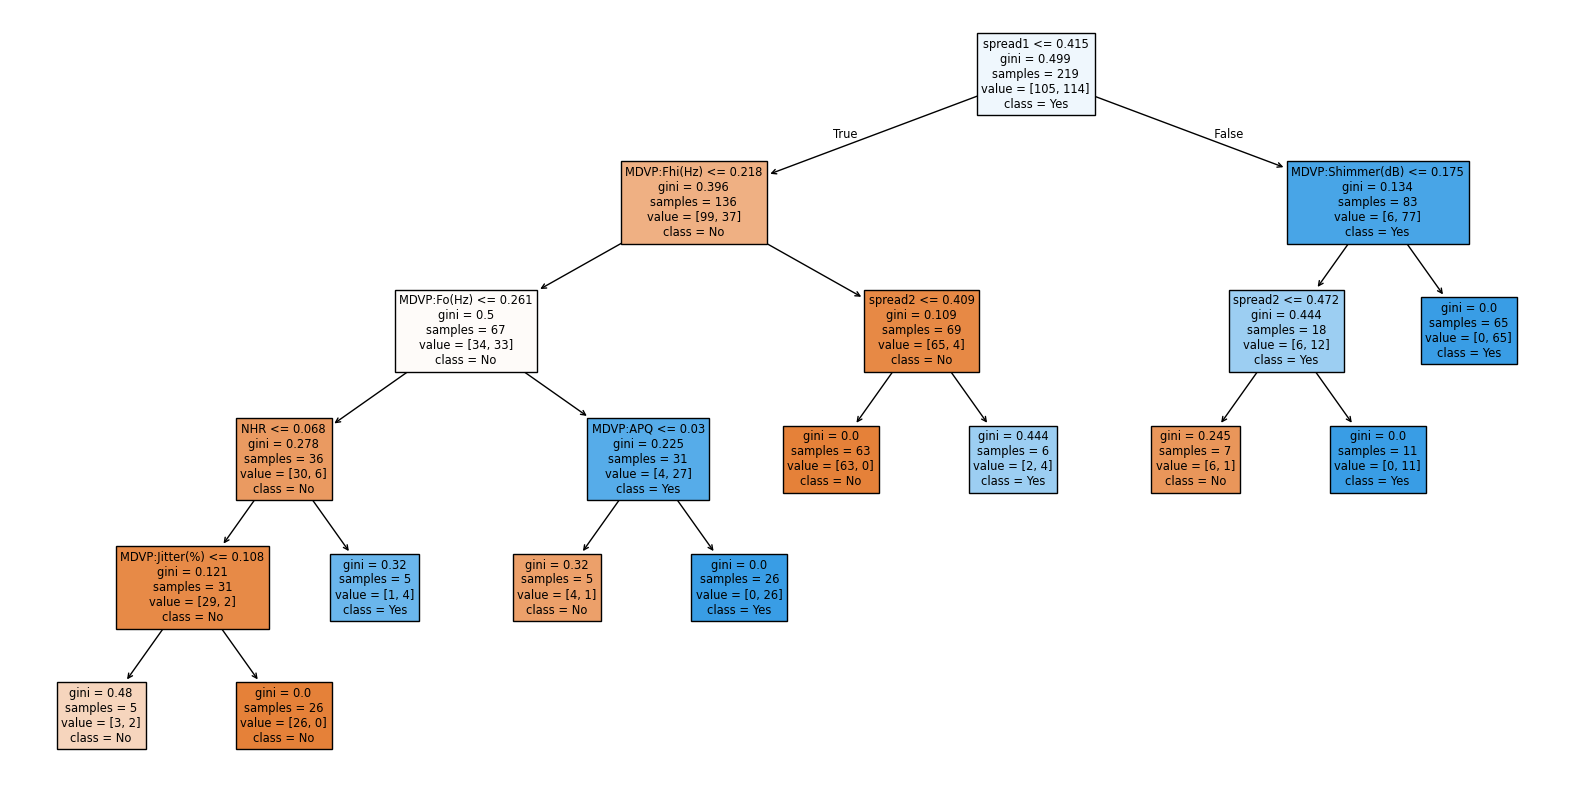

In [97]:
plt.figure(figsize=(20, 10))
plot_tree(model_decision_tree, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'])
plt.show()

- Random Forest

In [98]:

NUM_ITERATIONS = 10

def random_forest_algorithm():
    training_times = []
    inference_times = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracy_scores = []
    best_model = None

    for i in range(NUM_ITERATIONS):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
        model = RandomForestClassifier(n_estimators=15, criterion='gini', max_depth=18,  min_samples_split=3, min_samples_leaf=5, random_state=42)

        start_time = time.time() 
        model.fit(X_train, y_train)
        training_time = time.time() - start_time 
        training_times.append(training_time)

        start_time = time.time() 
        y_pred = model.predict(X_test)
        inference_time = time.time() - start_time 
        inference_times.append(inference_time)

        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        best_model = model if best_model is None or accuracy > max(accuracy_scores) else best_model
        accuracy_scores.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_predict_time = np.mean(inference_times)
    average_accuracy = np.mean(accuracy_scores)
    
    print("Precision:", round(average_precision,4)*100, "%")
    print("Recall:", round(average_recall,4)*100, "%")
    print("F1 score:", round(average_f1,4)*100, "%")
    print("Accuracy score:", round(average_accuracy,4)*100, "%")
    print("Training time:", round(average_training_time, 4), "seconds")
    print("Predict time:", round(average_predict_time, 4), "seconds")
    return best_model

model_random_forest = random_forest_algorithm()
joblib.dump(model_random_forest, r'..\models\model_random_forest_holdout.pkl')
model_random_forest

Precision: 89.18 %
Recall: 89.46 %
F1 score: 89.14999999999999 %
Accuracy score: 89.27000000000001 %
Training time: 0.0265 seconds
Predict time: 0.0024 seconds


RandomForestClassifier(max_depth=18, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=15, random_state=42)

In [99]:
print("Do quan trong cua mo hinh Random Forest:")
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

Do quan trong cua mo hinh Random Forest:
             Feature  Importance
18           spread1    0.219639
21               PPE    0.159862
7         Jitter:DDP    0.075167
12          MDVP:APQ    0.063488
1       MDVP:Fhi(Hz)    0.059825
11      Shimmer:APQ5    0.055466
8       MDVP:Shimmer    0.052257
0        MDVP:Fo(Hz)    0.044514
19           spread2    0.039043
2       MDVP:Flo(Hz)    0.038008
10      Shimmer:APQ3    0.031696
9   MDVP:Shimmer(dB)    0.030957
4   MDVP:Jitter(Abs)    0.026335
6           MDVP:PPQ    0.018117
5           MDVP:RAP    0.016436
15               HNR    0.015331
20                D2    0.015179
17               DFA    0.013094
13       Shimmer:DDA    0.011244
3     MDVP:Jitter(%)    0.010446
16              RPDE    0.003770
14               NHR    0.000126


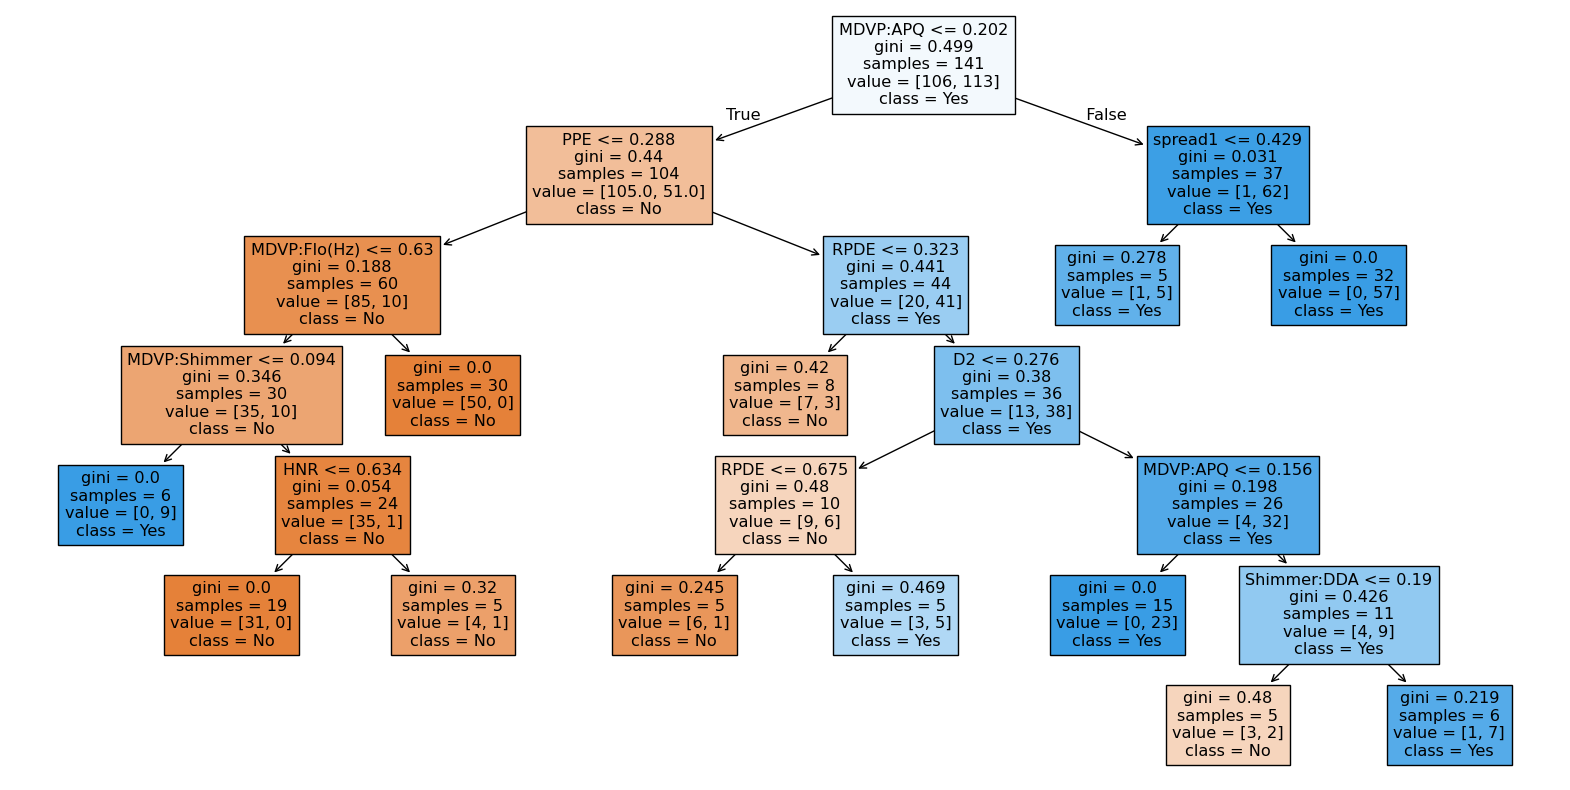

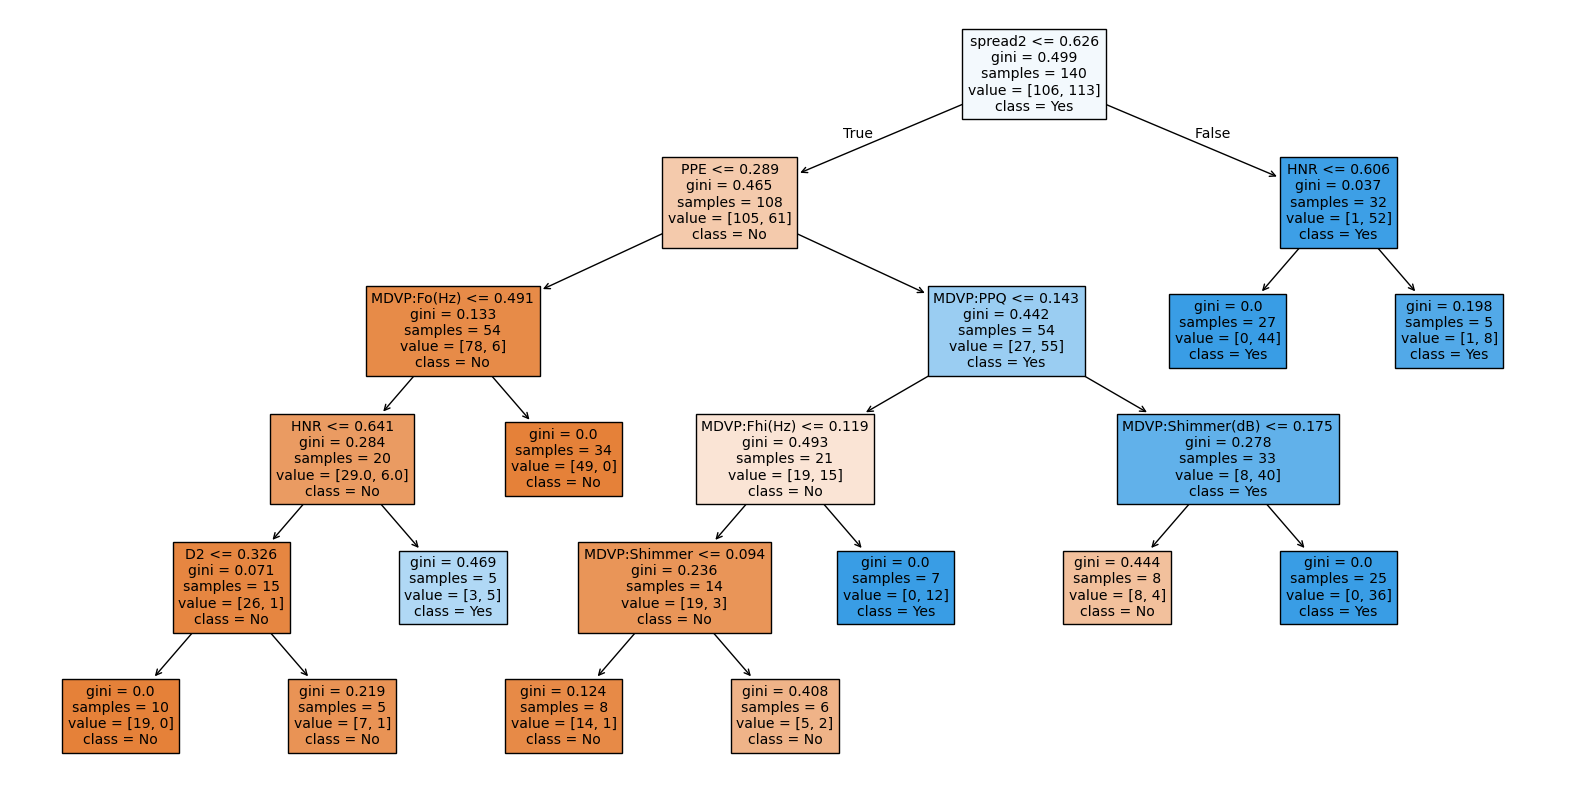

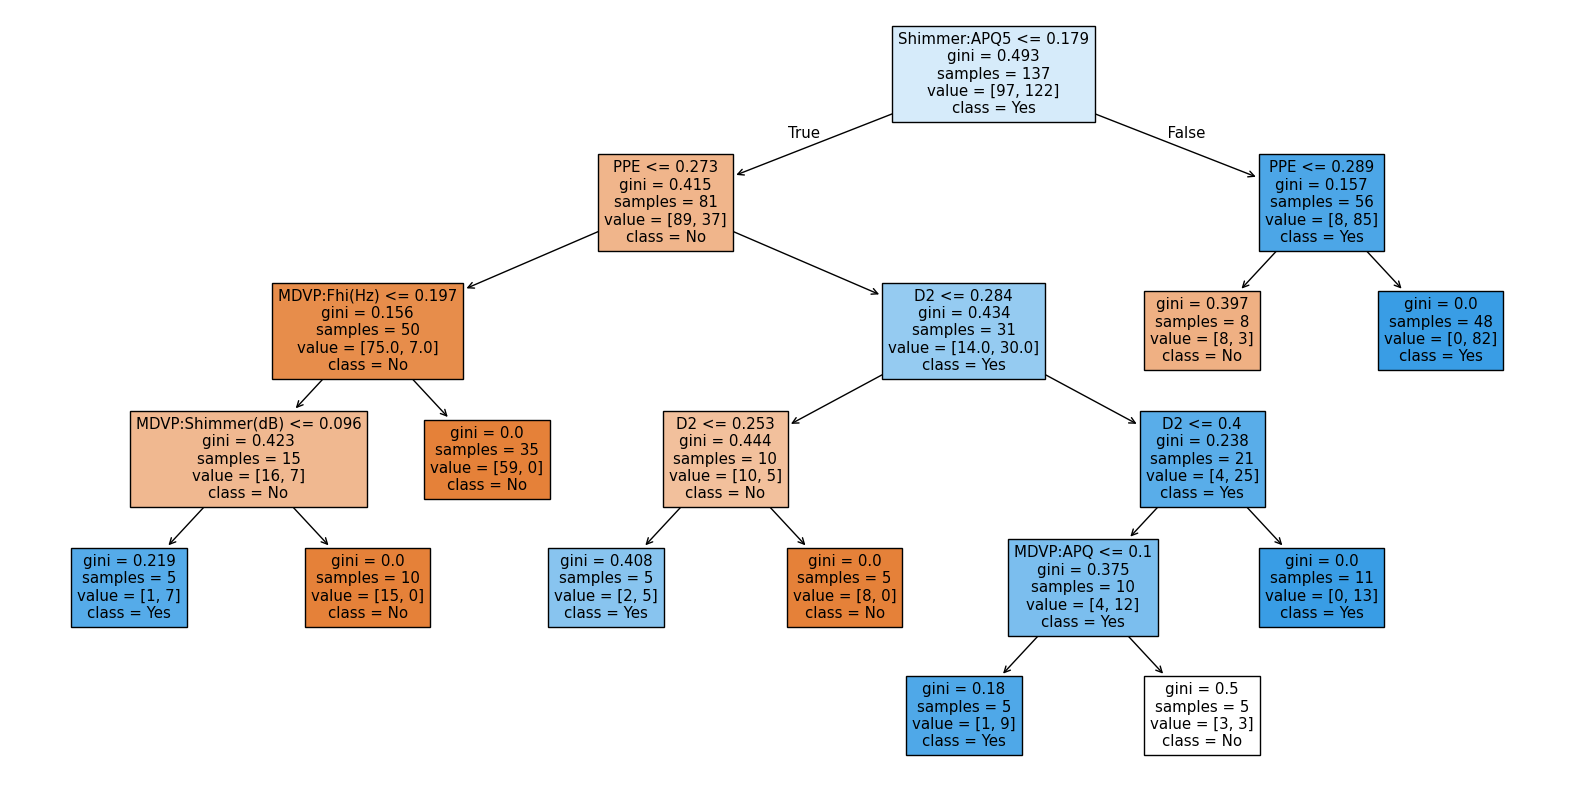

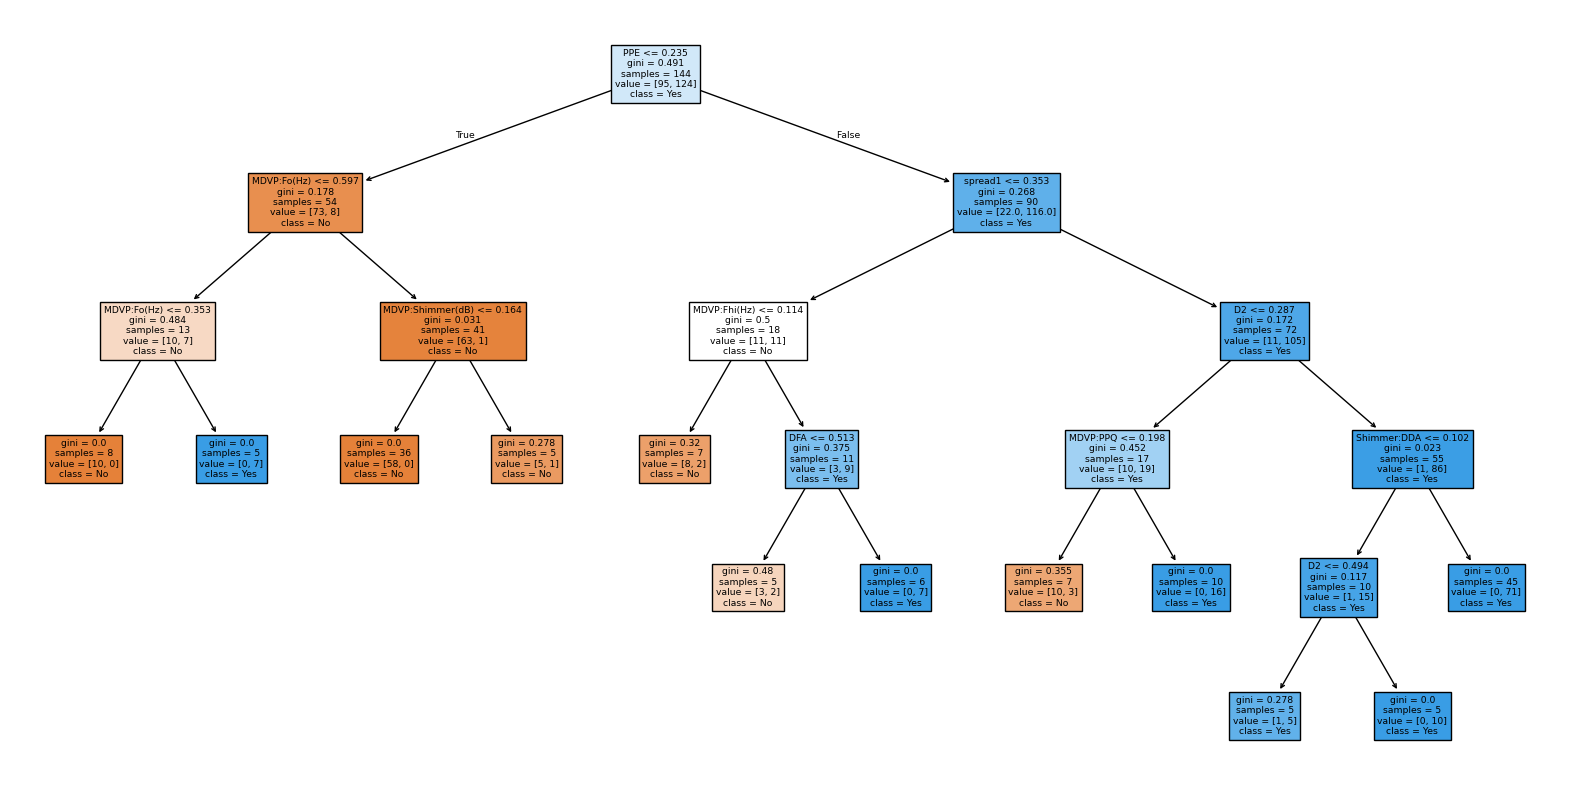

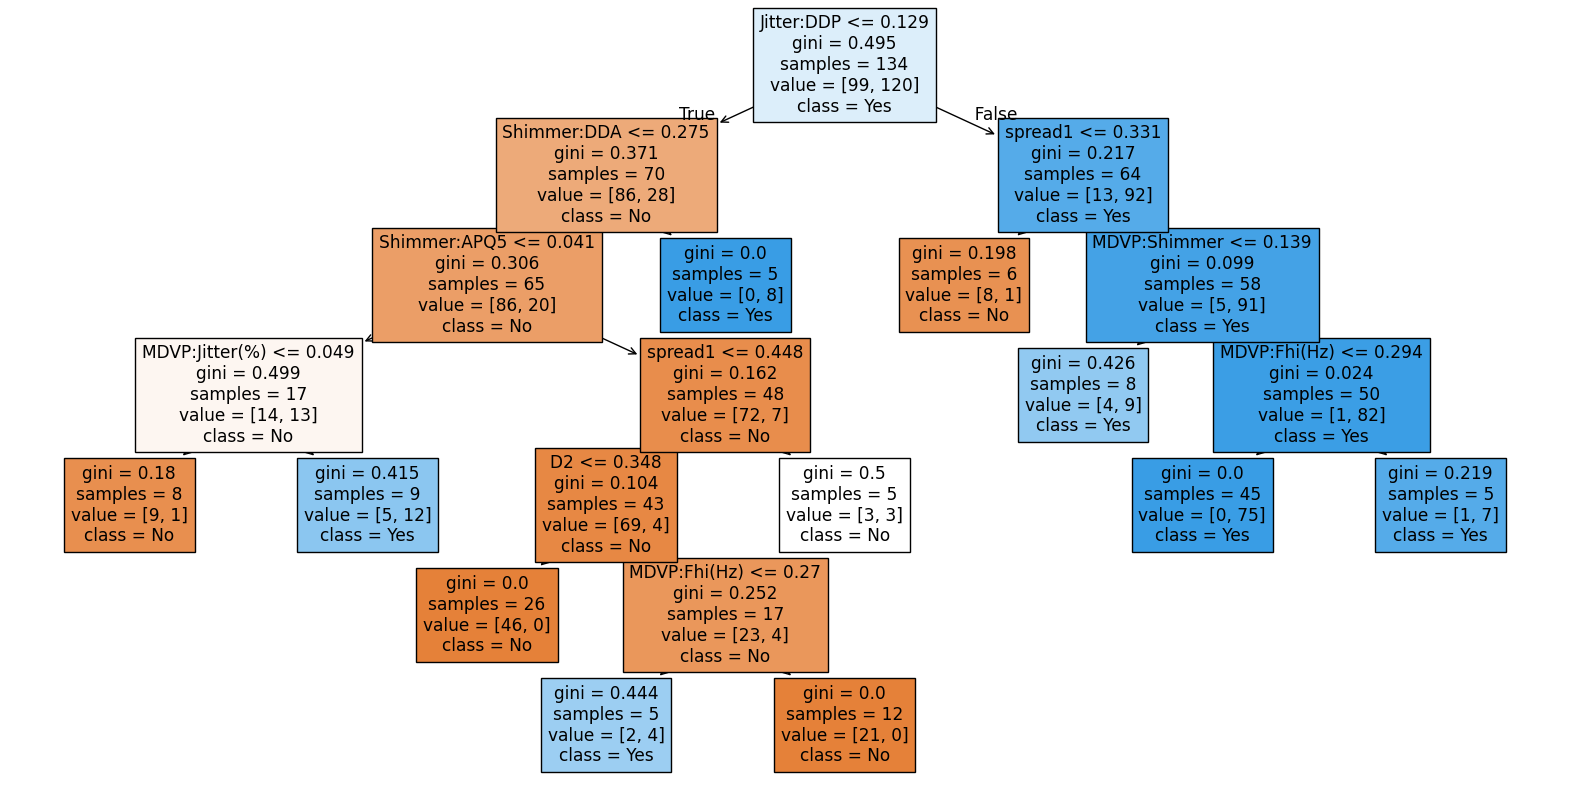

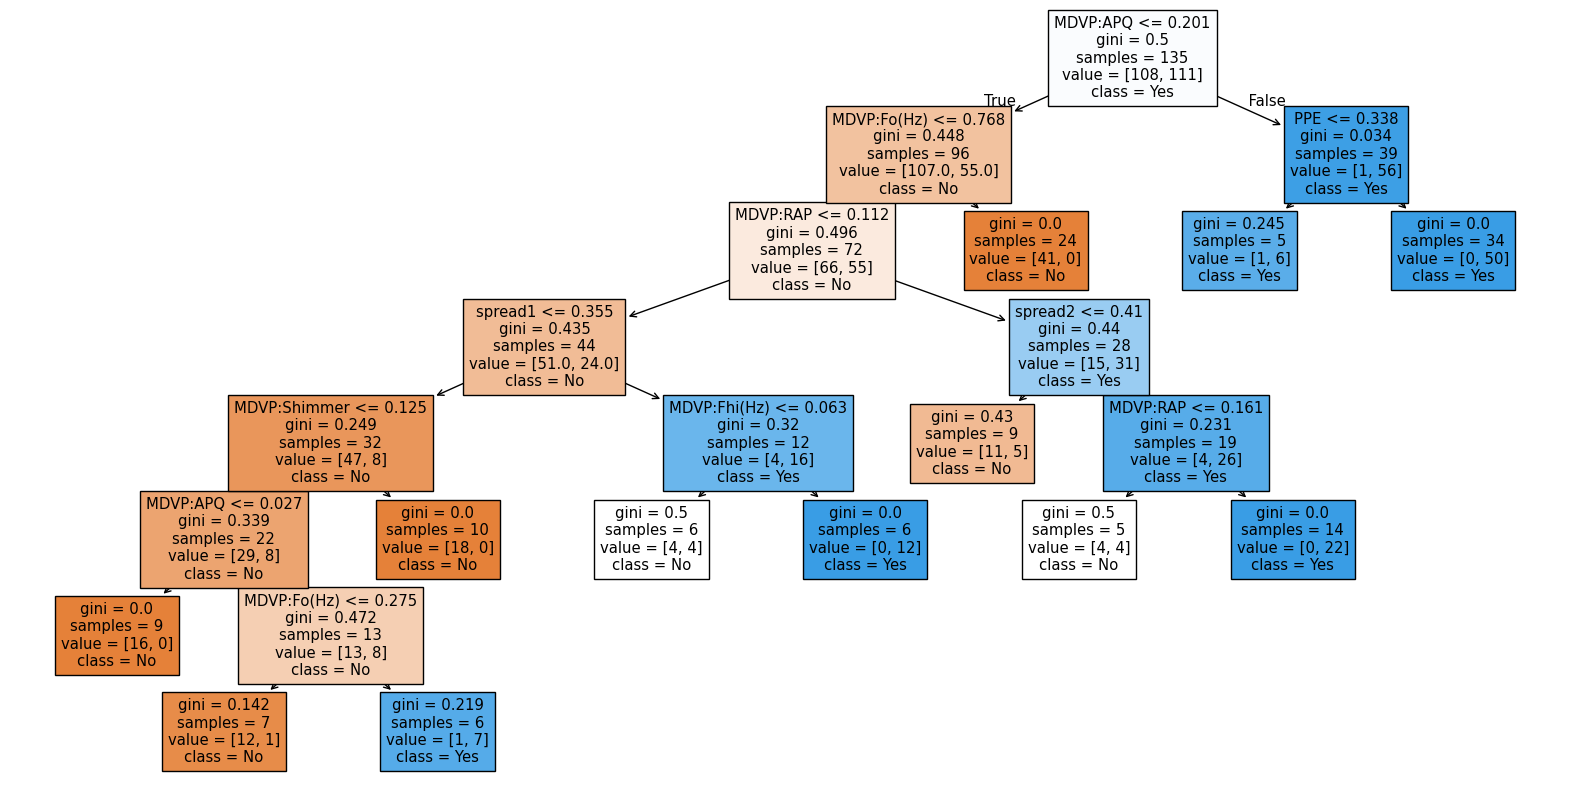

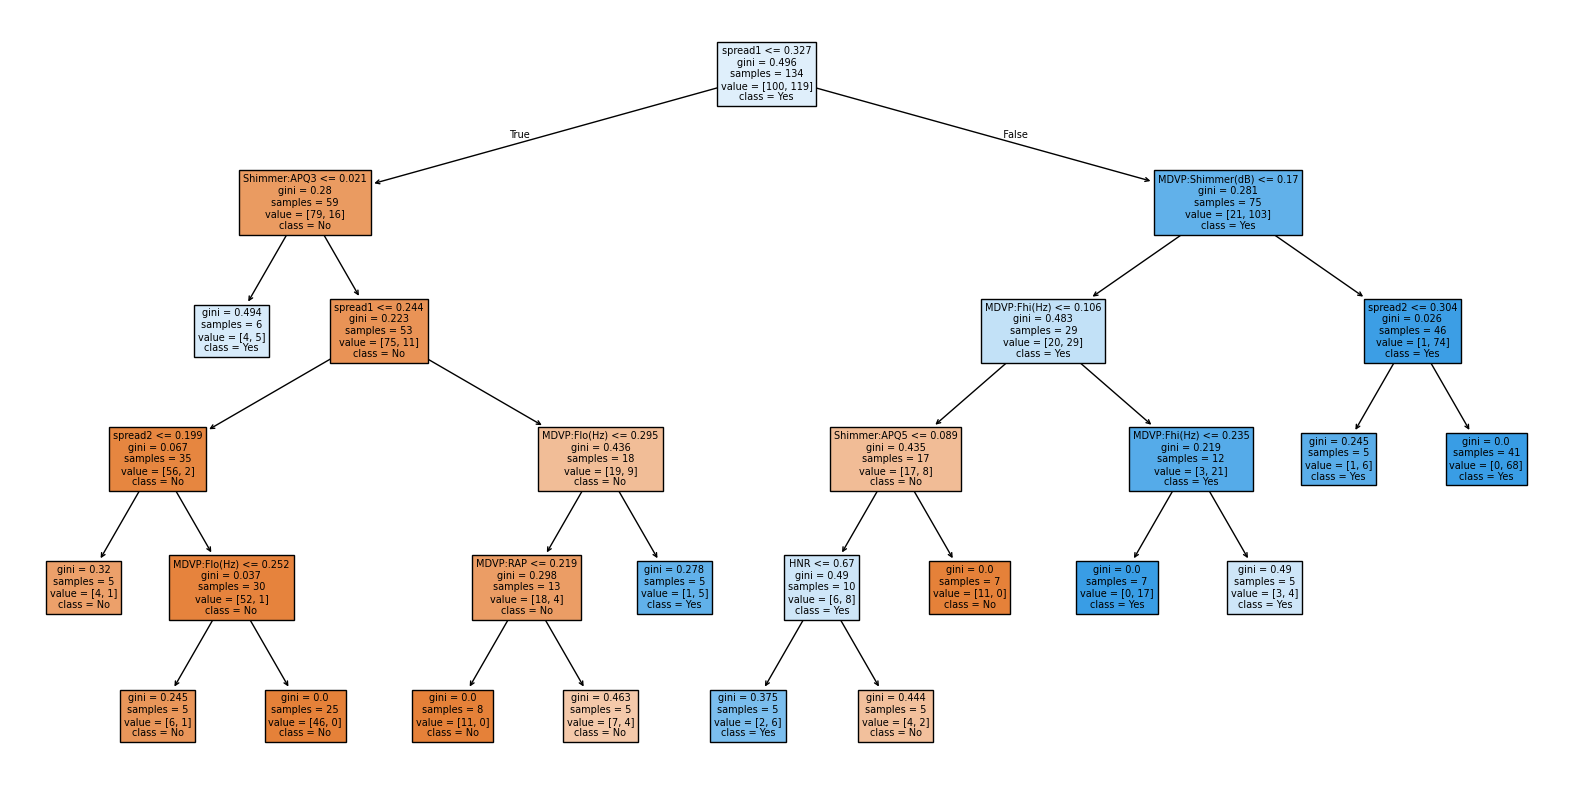

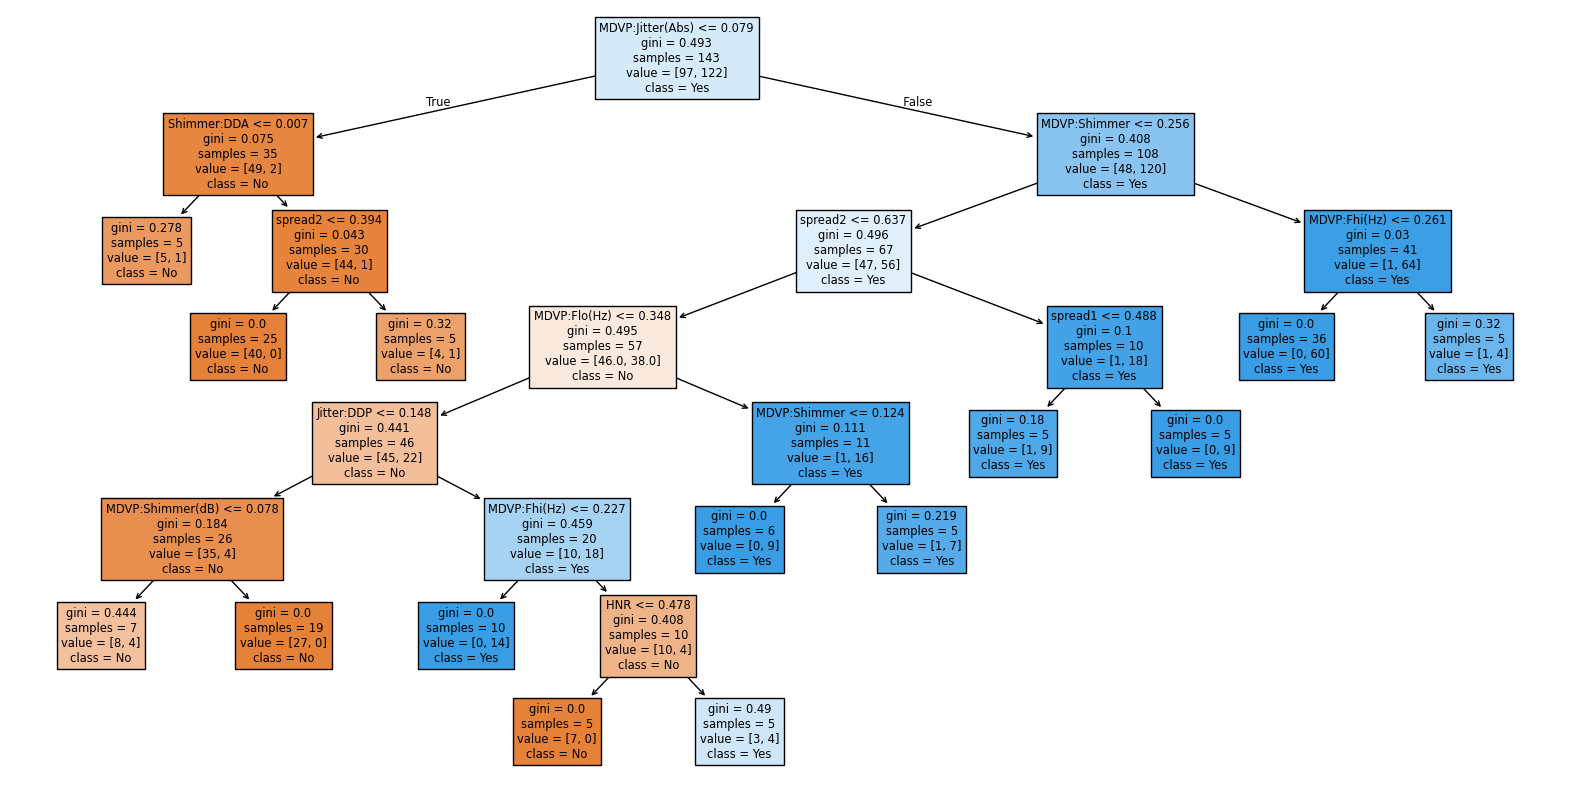

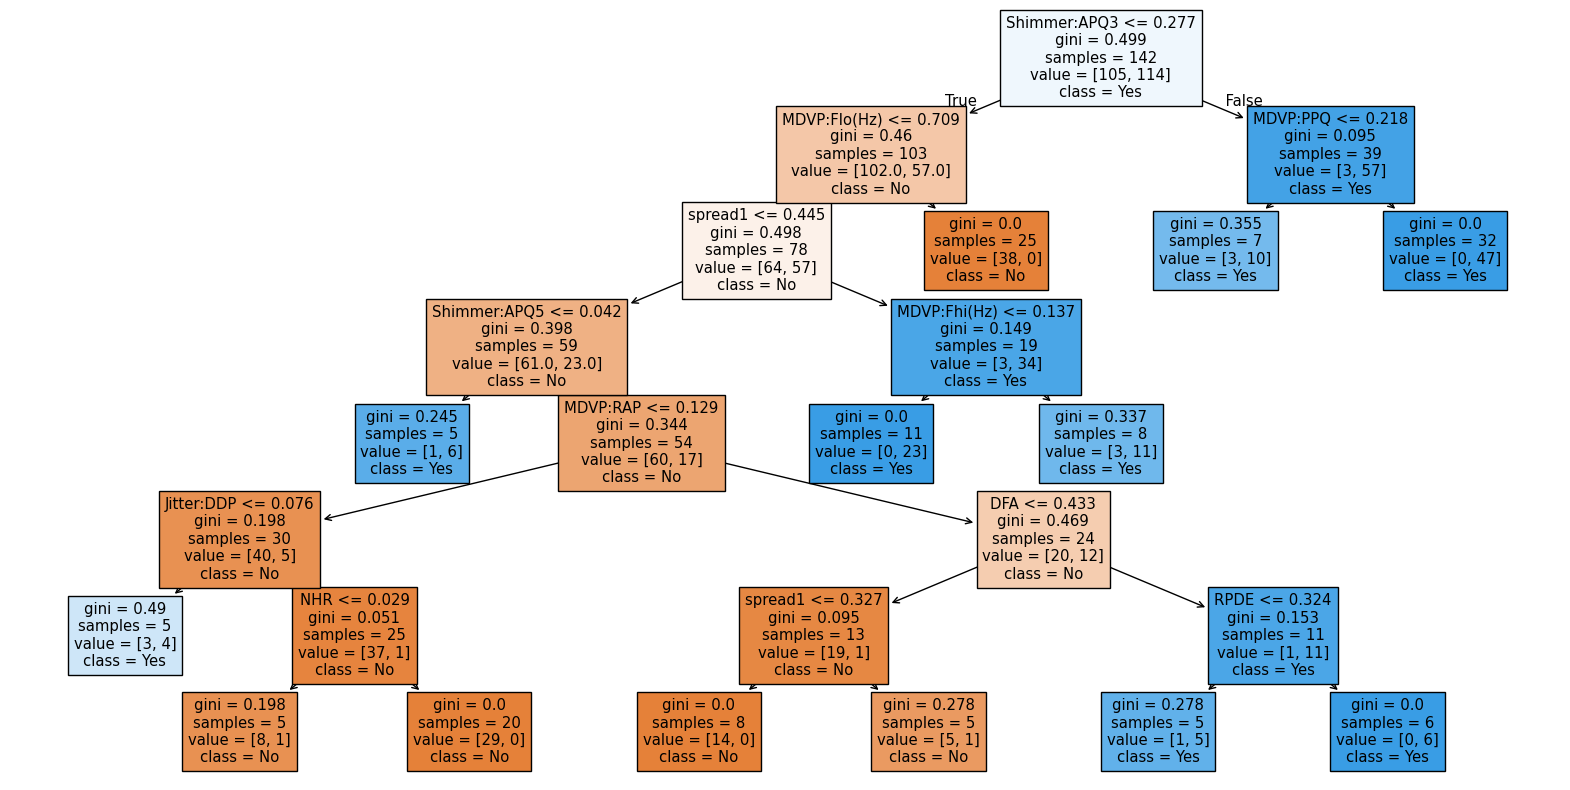

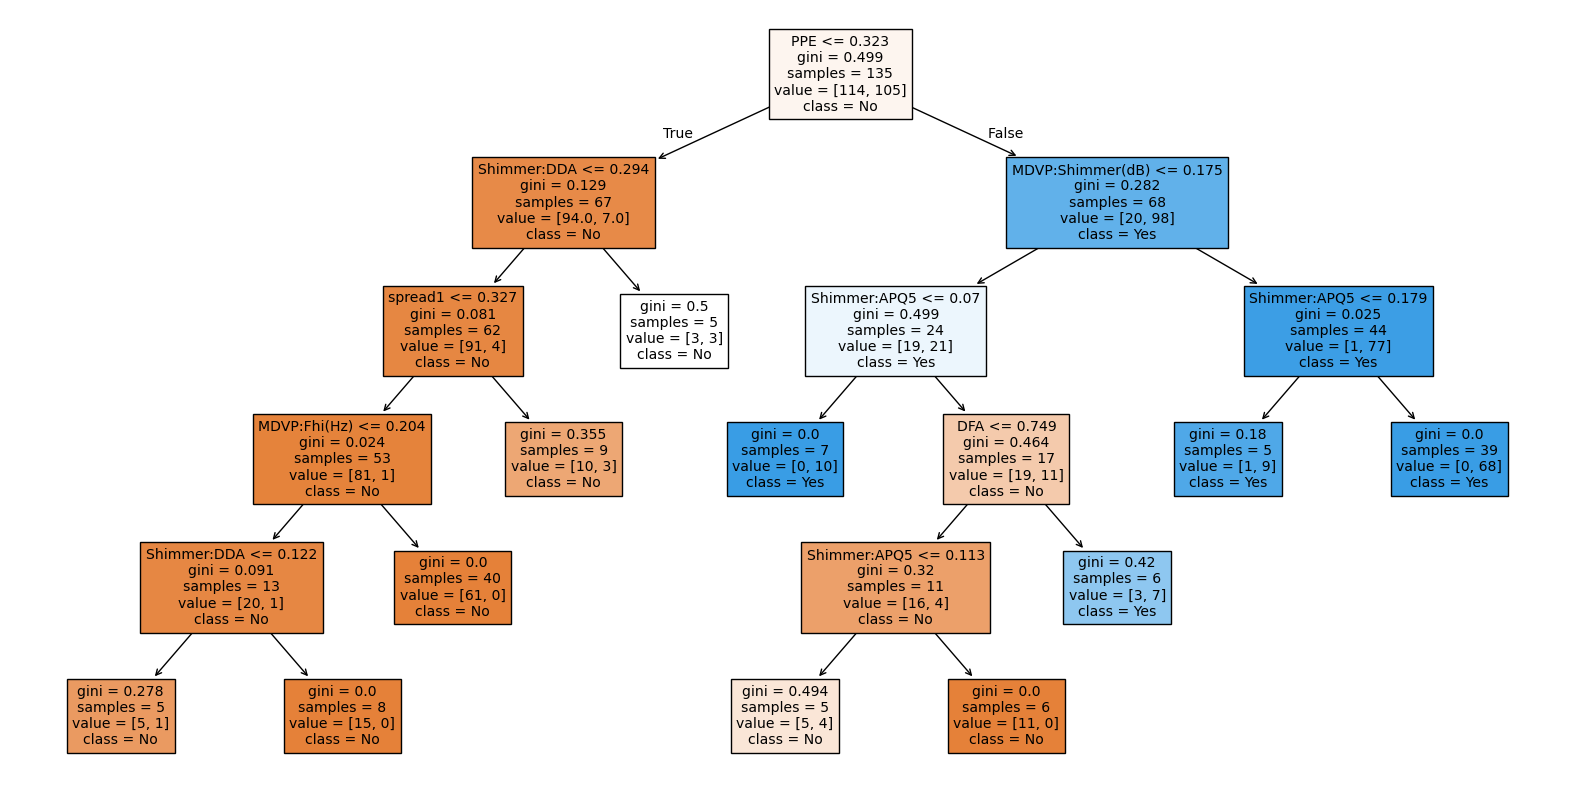

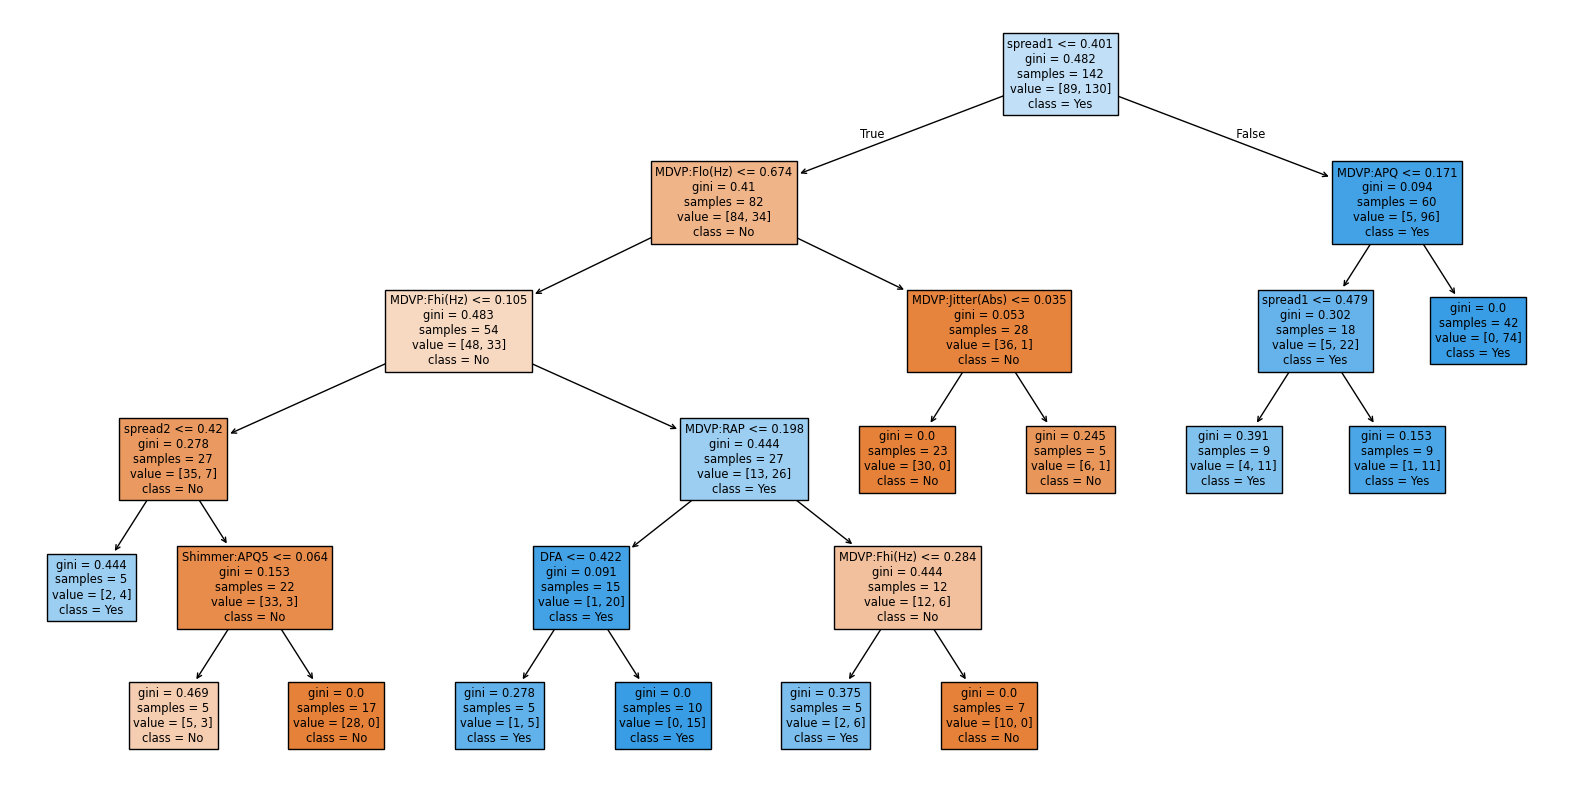

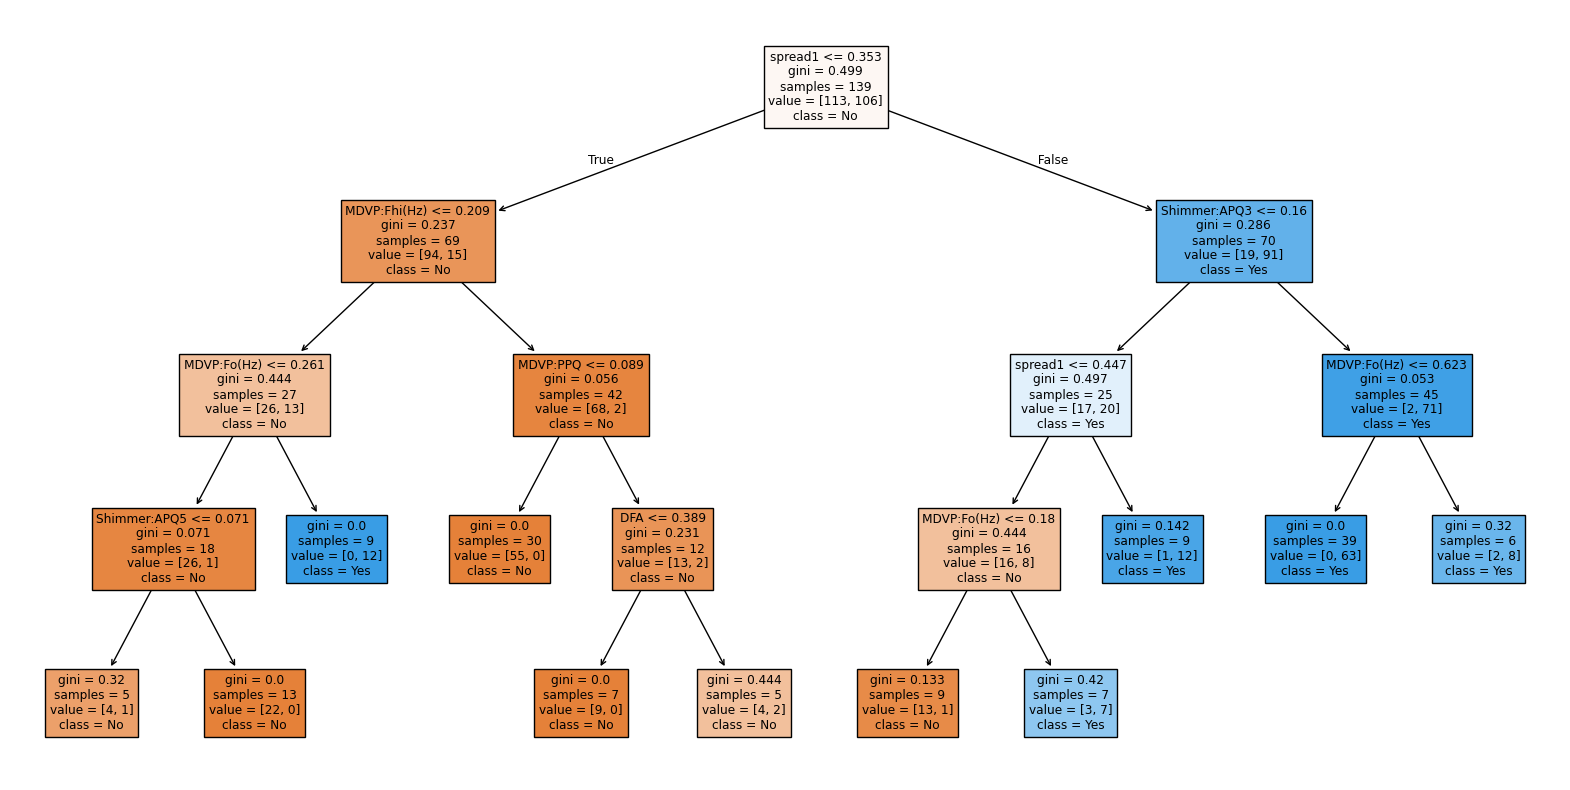

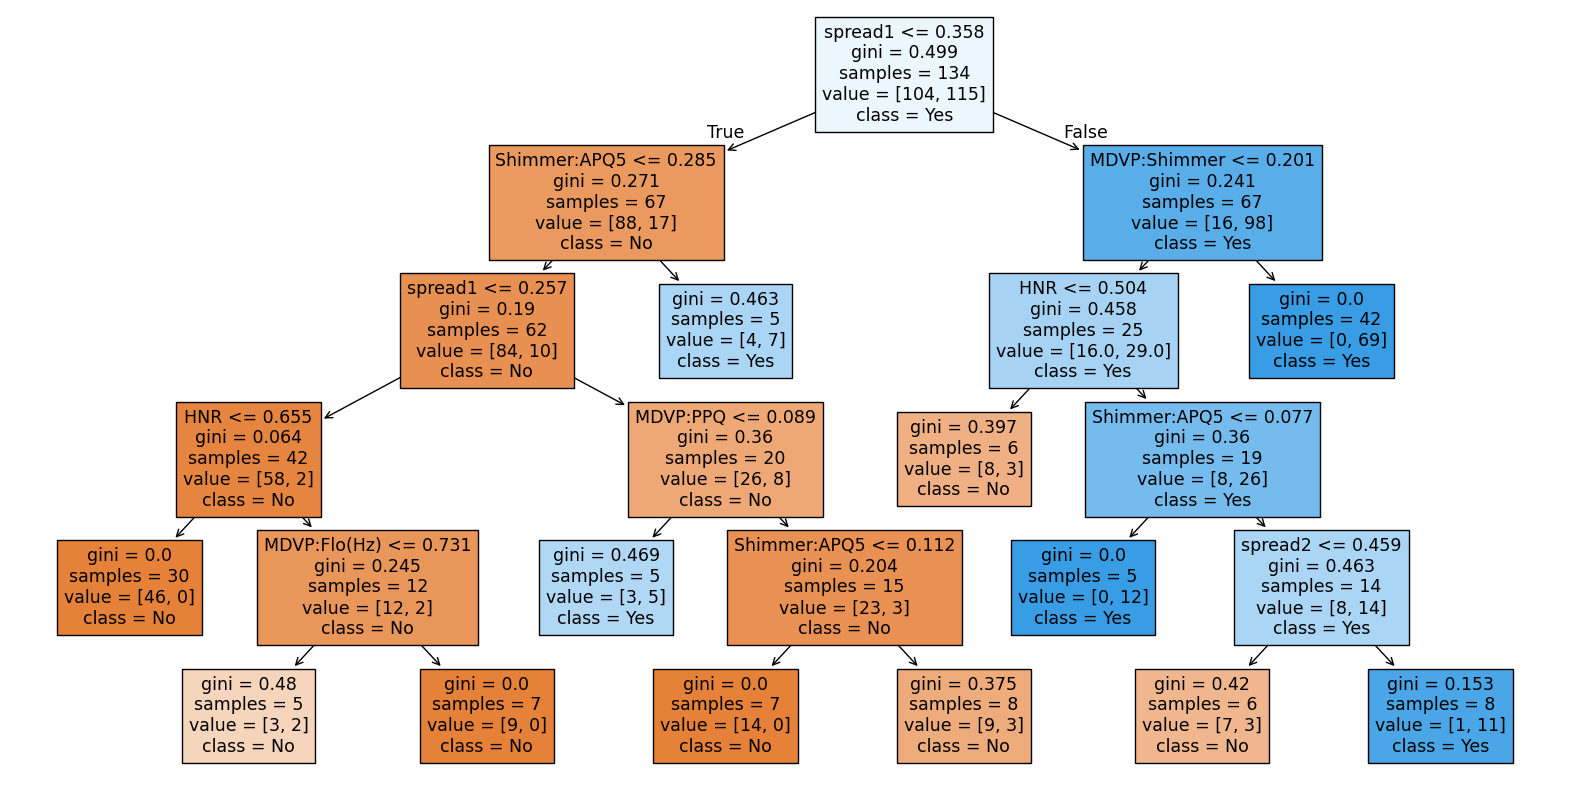

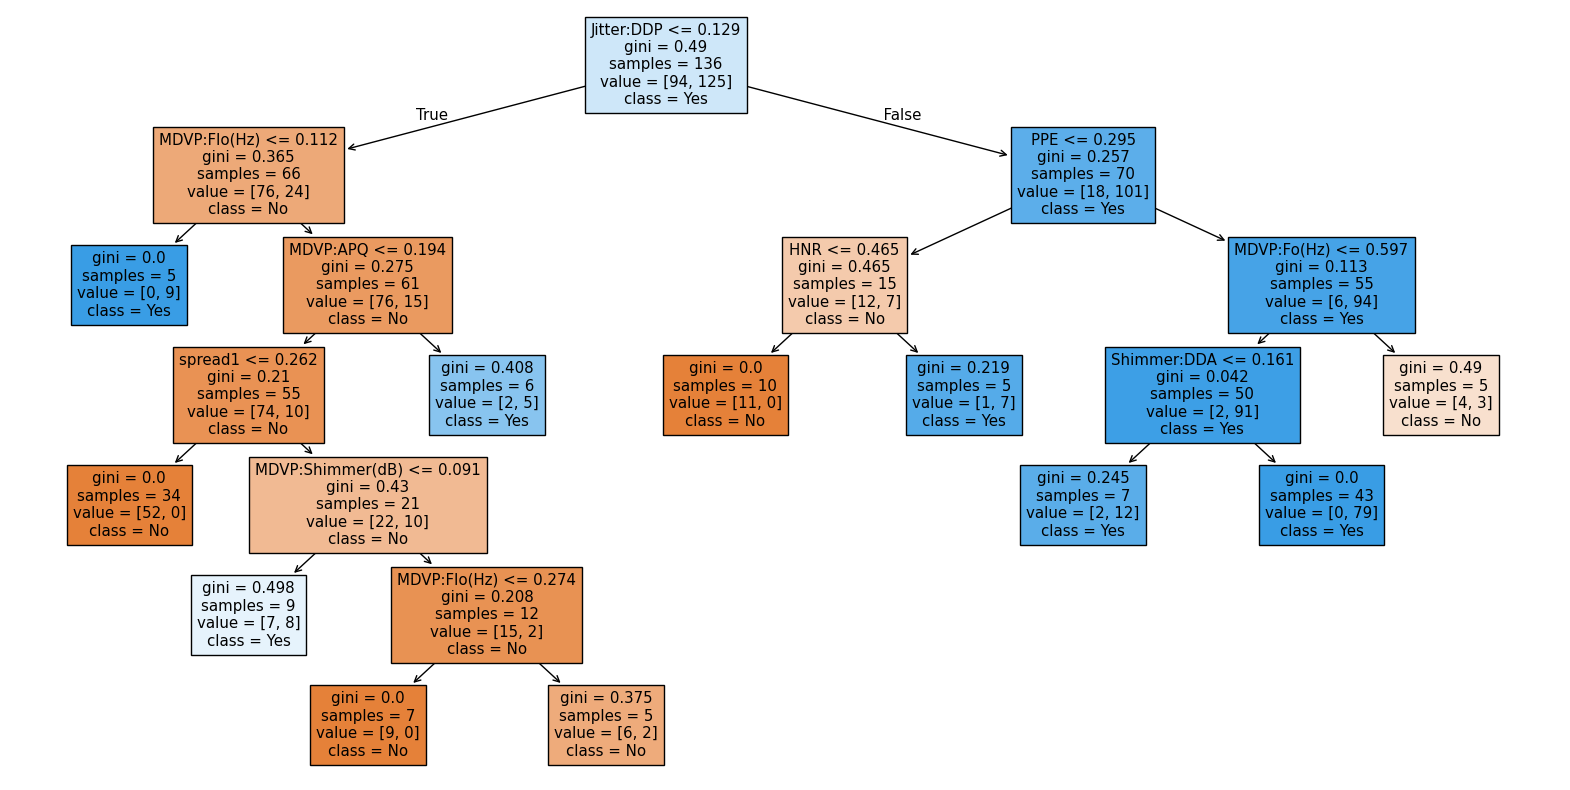

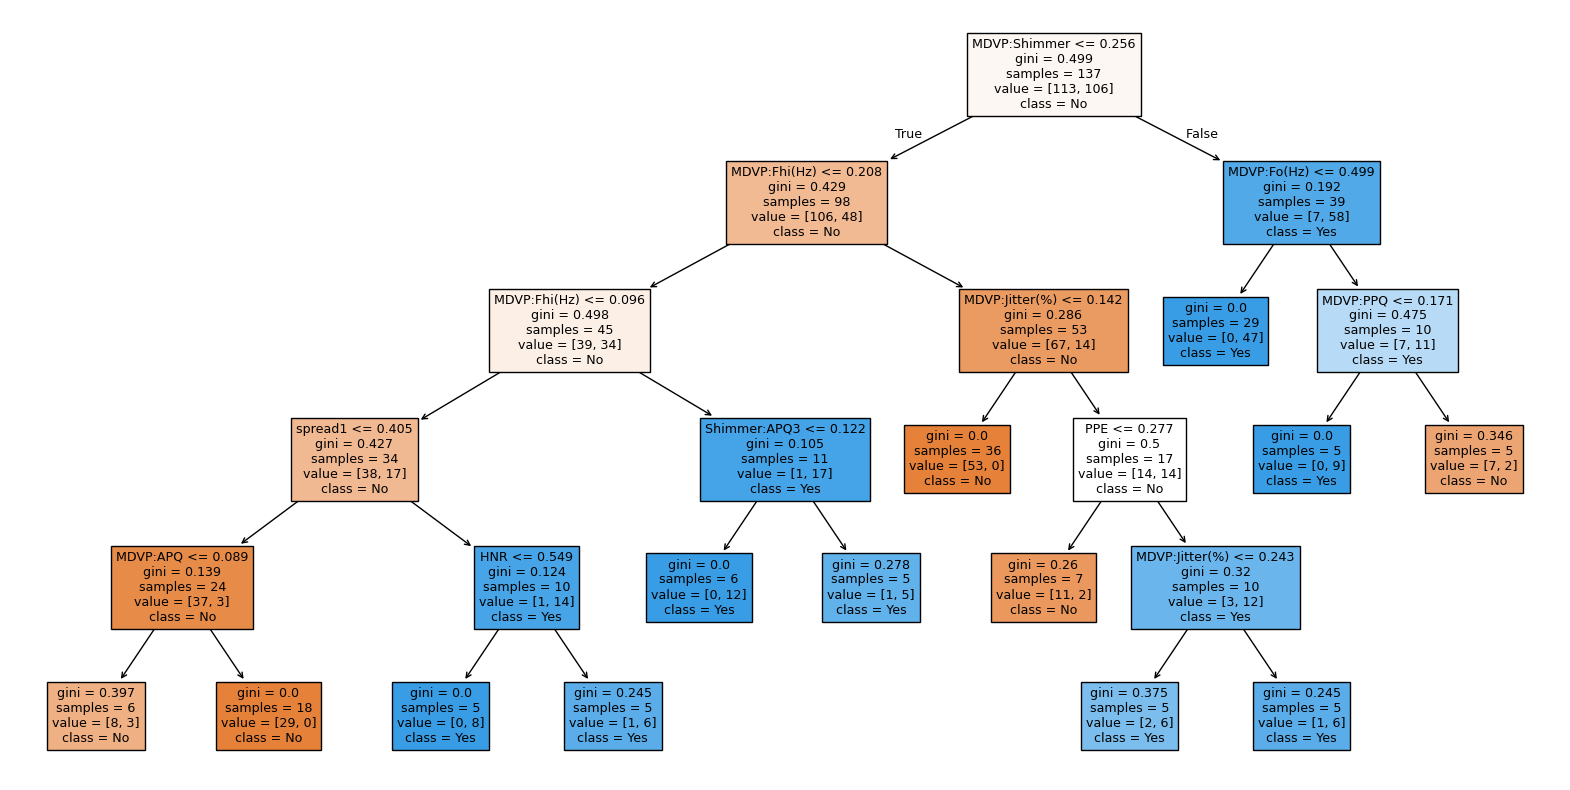

In [100]:
for model in model_random_forest.estimators_:
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
              filled=True, 
              feature_names=X.columns, 
              class_names=['No', 'Yes'])
    plt.show()

NGHI THỨC K-FOLD

- KNN

In [101]:
def KNN():
    k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
    training_times = []
    predict_times = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracy_scores = []
    best_model = None

    for train_indices, test_indices in k_fold.split(X):

        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        model = KNeighborsClassifier(n_neighbors=21)


        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        training_times.append(training_time)


        start_time = time.time()
        y_pred = model.predict(X_test)
        predict_time = time.time() - start_time
        predict_times.append(predict_time)
        accuracy = accuracy_score(y_test, y_pred)

        best_model = model if best_model is None or accuracy > max(accuracy_scores) else best_model
        accuracy_scores.append(accuracy)
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_predict_time = np.mean(predict_times)
    average_accuracy = np.mean(accuracy_scores)
    
    print("Precision:", round(average_precision,4)*100, "%")
    print("Recall:", round(average_recall,4)*100, "%")
    print("F1 score:", round(average_f1,4)*100, "%")
    print("Accuracy score:", round(average_accuracy,4)*100, "%")
    print("Training time:", round(average_training_time, 4), "seconds")
    print("Predict time:", round(average_predict_time, 4), "seconds")
    return best_model

model_KNN = KNN()
joblib.dump(model_KNN, r'..\models\model_KNN_kfold.pkl')
model_KNN

Precision: 85.96000000000001 %
Recall: 83.93 %
F1 score: 82.95 %
Accuracy score: 83.93 %
Training time: 0.0018 seconds
Predict time: 0.0187 seconds


KNeighborsClassifier(n_neighbors=21)

- Decision Tree


In [102]:
def DecisionTree():
    k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
    training_times = []
    predict_times = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracy_scores = []
    best_model = None
    
    for train_indices, test_indices in k_fold.split(X):

        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        model = DecisionTreeClassifier(criterion='gini', max_depth=18, min_samples_split=3, min_samples_leaf=5, random_state=42)

        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        training_times.append(training_time)

        start_time = time.time()
        y_pred = model.predict(X_test)
        predict_time = time.time() - start_time
        predict_times.append(predict_time)

        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        best_model = model if best_model is None or accuracy > max(accuracy_scores) else best_model
        accuracy_scores.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_predict_time = np.mean(predict_times)
    average_accuracy = np.mean(accuracy_scores)

    print("Precision:", round(average_precision,4)*100, "%")
    print("Recall:", round(average_recall,4)*100, "%")
    print("F1 score:", round(average_f1,4)*100, "%")
    print("Accuracy score:", round(average_accuracy,4)*100, "%")
    print("Training time:", round(average_training_time, 4), "seconds")
    print("Predict time:", round(average_predict_time, 4), "seconds")
    return best_model

model_decision_tree = DecisionTree()
joblib.dump(model_decision_tree, r'..\models\model_decision_tree_kfold.pkl')
model_decision_tree

Precision: 89.82 %
Recall: 89.60000000000001 %
F1 score: 89.25999999999999 %
Accuracy score: 89.75 %
Training time: 0.0039 seconds
Predict time: 0.001 seconds


DecisionTreeClassifier(max_depth=18, min_samples_leaf=5, min_samples_split=3,
                       random_state=42)

In [103]:
print("Do quan trong cua mo hinh Decision Tree:")
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

Do quan trong cua mo hinh Decision Tree:
             Feature  Importance
18           spread1    0.482315
2       MDVP:Flo(Hz)    0.187310
0        MDVP:Fo(Hz)    0.093089
19           spread2    0.069278
11      Shimmer:APQ5    0.061997
17               DFA    0.057377
14               NHR    0.029144
3     MDVP:Jitter(%)    0.012386
8       MDVP:Shimmer    0.007104
5           MDVP:RAP    0.000000
20                D2    0.000000
4   MDVP:Jitter(Abs)    0.000000
16              RPDE    0.000000
15               HNR    0.000000
13       Shimmer:DDA    0.000000
6           MDVP:PPQ    0.000000
12          MDVP:APQ    0.000000
1       MDVP:Fhi(Hz)    0.000000
10      Shimmer:APQ3    0.000000
9   MDVP:Shimmer(dB)    0.000000
7         Jitter:DDP    0.000000
21               PPE    0.000000


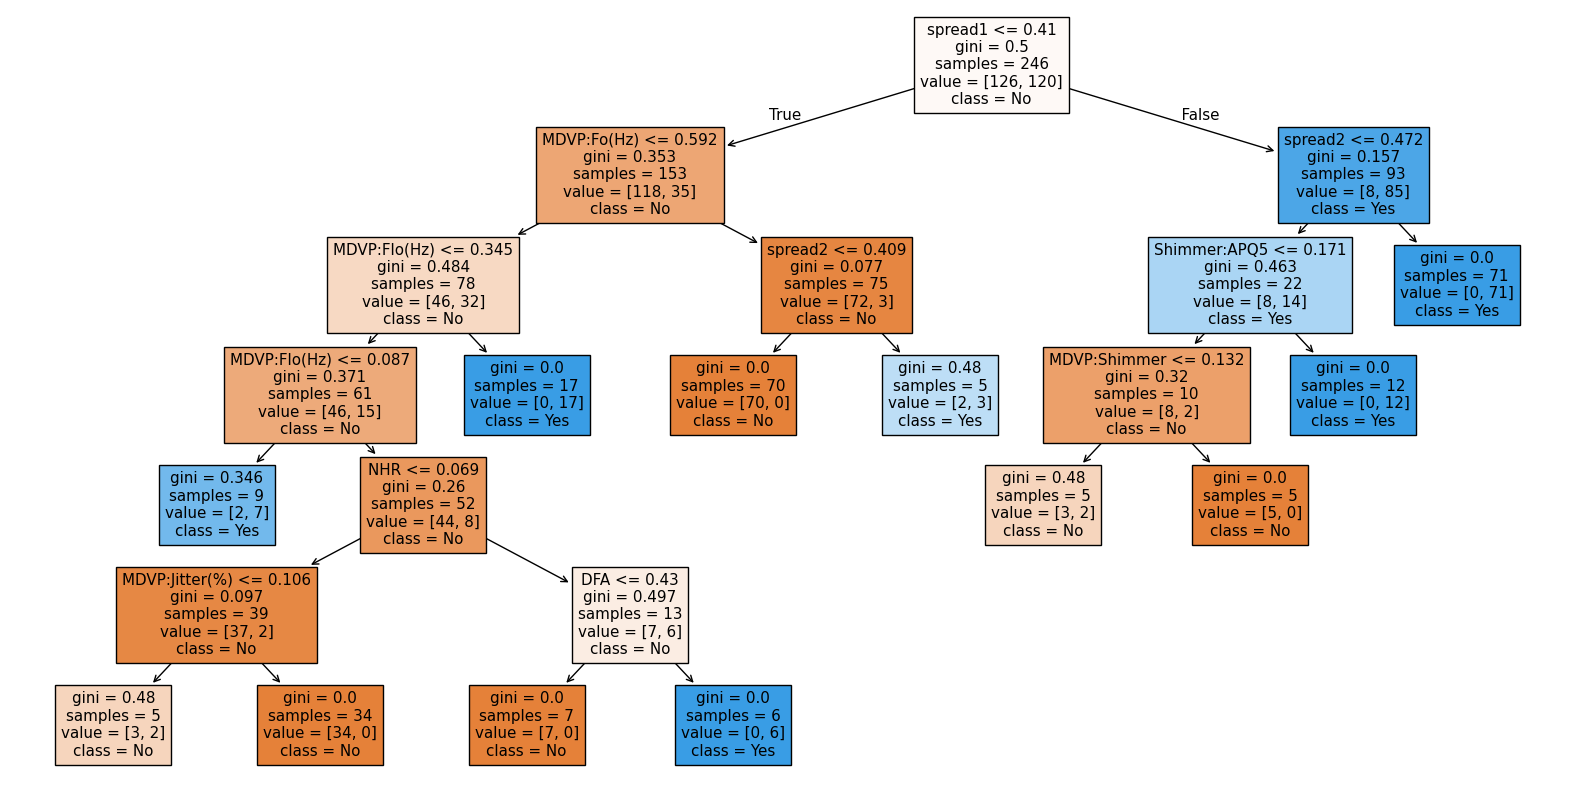

In [104]:
plt.figure(figsize=(20, 10))
plot_tree(model_decision_tree, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'])
plt.show()

- Random Forest

In [105]:
def RandomForest():
    k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
    precisions = []
    recalls = []
    f1_scores = []
    training_times = []
    predict_times = []
    accuracy_scores = []
    best_model = None

    for train_indices, test_indices in k_fold.split(X):

        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        model = RandomForestClassifier(n_estimators=15, criterion='gini', max_depth=18,  min_samples_split=3, min_samples_leaf=5, random_state=42)

        start_time = time.time()
        model.fit(X_train, y_train) 
        training_time = time.time() - start_time
        training_times.append(training_time)

        start_time = time.time()
        y_pred = model.predict(X_test)
        predict_time = time.time() - start_time
        predict_times.append(predict_time)

        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        best_model = model if best_model is None or accuracy > max(accuracy_scores) else best_model
        accuracy_scores.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)
    average_f1 = np.mean(f1_scores)
    average_training_time = np.mean(training_times)
    average_predict_time = np.mean(predict_times)
    average_accuracy = np.mean(accuracy_scores)

    print("Precision:", round(average_precision,4)*100, "%")
    print("Recall:", round(average_recall,4)*100, "%")
    print("F1 score:", round(average_f1,4)*100, "%")
    print("Accuracy score:", round(average_accuracy,4)*100, "%")
    print("Training time:", round(average_training_time, 4), "seconds")
    print("Predict time:", round(average_predict_time, 4), "seconds")
    return best_model

model_random_forest = RandomForest()
joblib.dump(model_random_forest, r'..\models\model_random_forest_kfold.pkl')
model_random_forest

Precision: 89.84 %
Recall: 89.28 %
F1 score: 88.77000000000001 %
Accuracy score: 89.42999999999999 %
Training time: 0.0266 seconds
Predict time: 0.0027 seconds


RandomForestClassifier(max_depth=18, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=15, random_state=42)

In [106]:
print("Do quan trong cua mo hinh Random Forest:")
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

Do quan trong cua mo hinh Random Forest:
             Feature  Importance
21               PPE    0.173236
18           spread1    0.149782
0        MDVP:Fo(Hz)    0.100982
11      Shimmer:APQ5    0.073750
1       MDVP:Fhi(Hz)    0.069298
12          MDVP:APQ    0.055111
8       MDVP:Shimmer    0.051723
19           spread2    0.050119
10      Shimmer:APQ3    0.038095
2       MDVP:Flo(Hz)    0.032965
6           MDVP:PPQ    0.031382
20                D2    0.030447
7         Jitter:DDP    0.028885
14               NHR    0.025013
17               DFA    0.016308
4   MDVP:Jitter(Abs)    0.014290
3     MDVP:Jitter(%)    0.012769
13       Shimmer:DDA    0.011771
16              RPDE    0.011268
9   MDVP:Shimmer(dB)    0.010344
15               HNR    0.009984
5           MDVP:RAP    0.002477


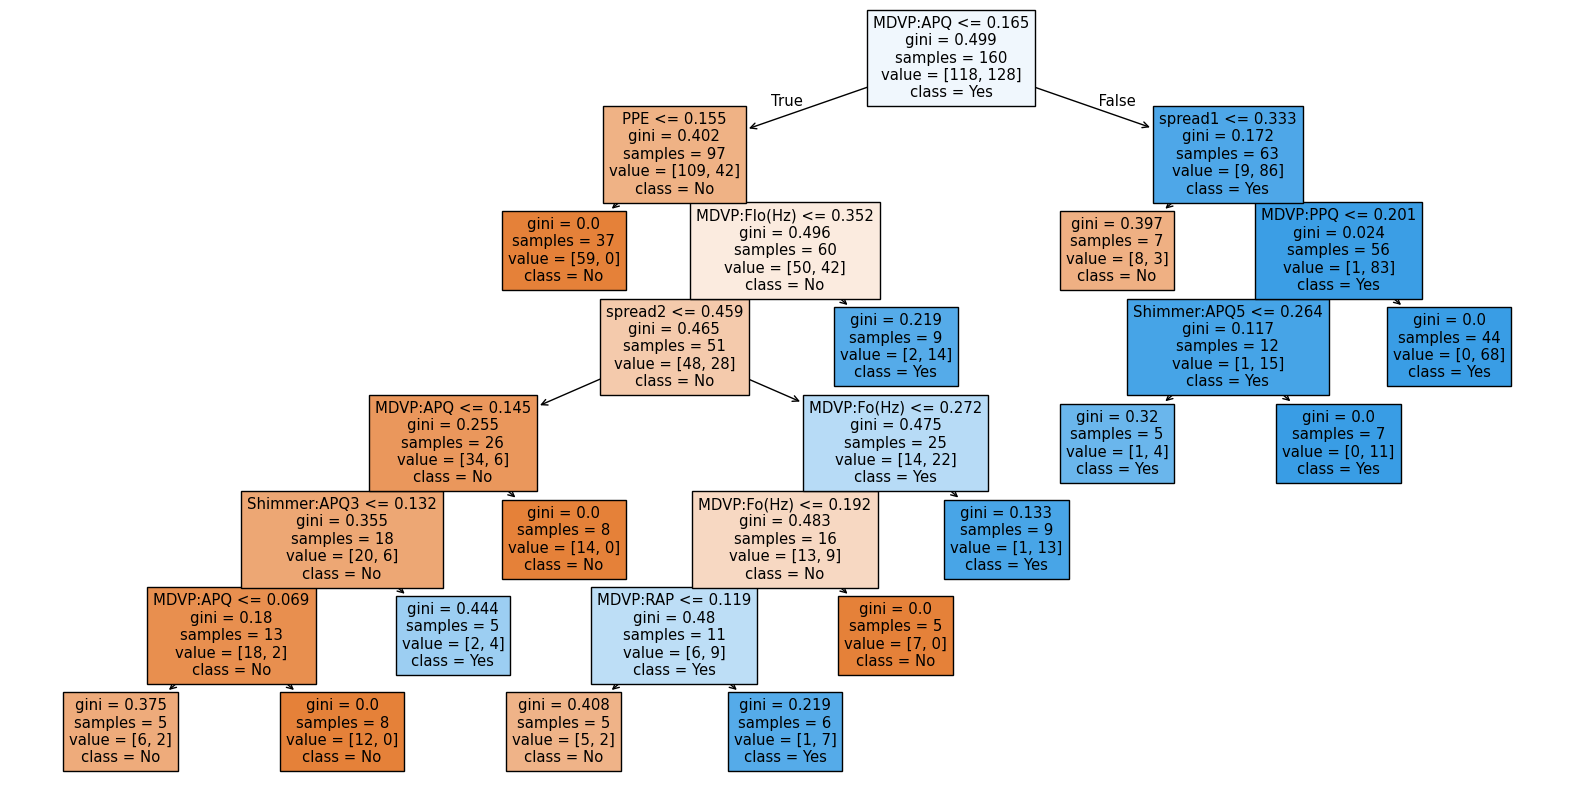

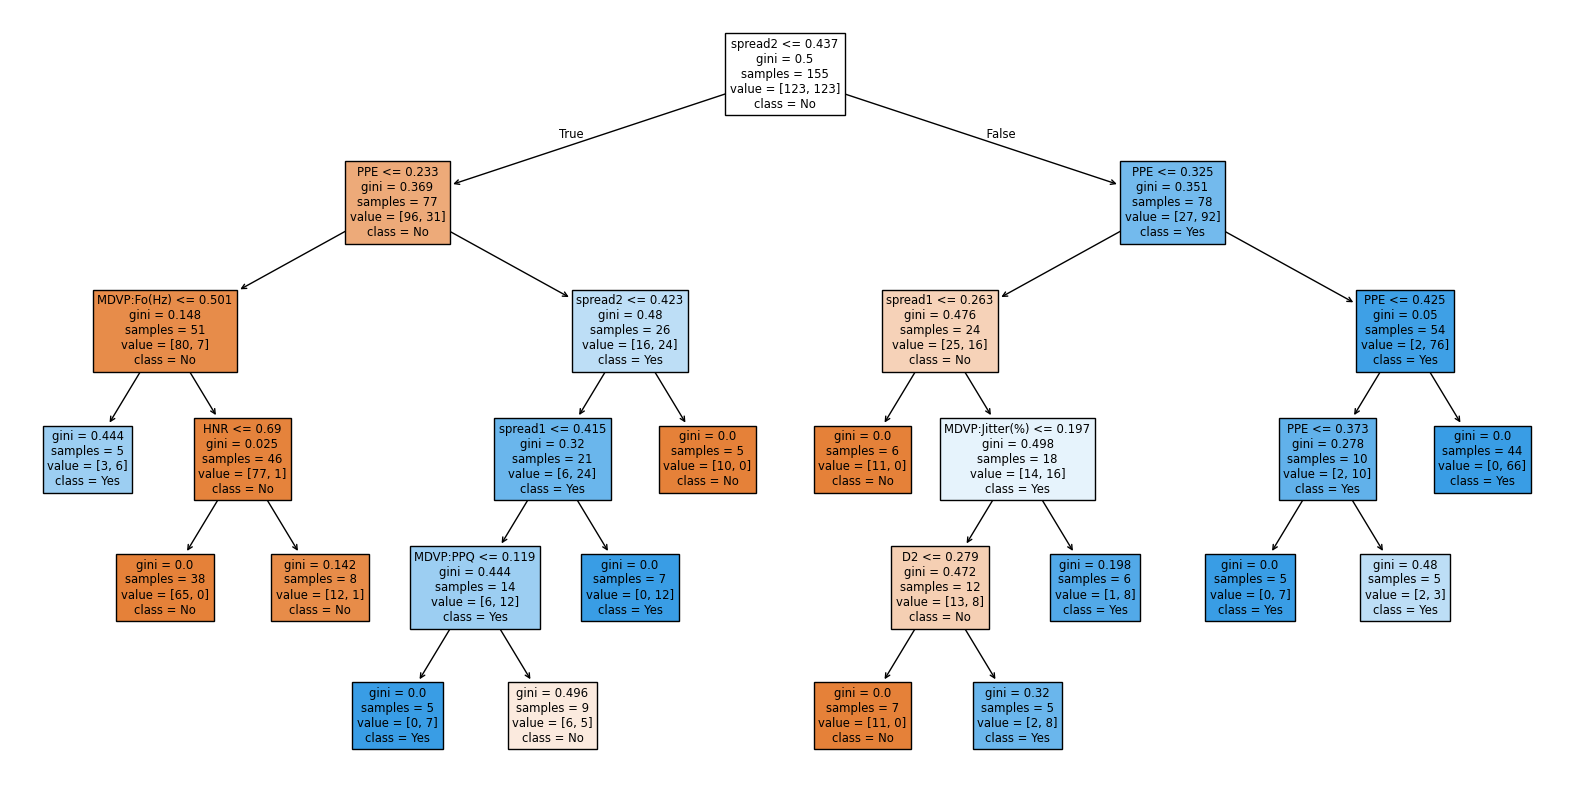

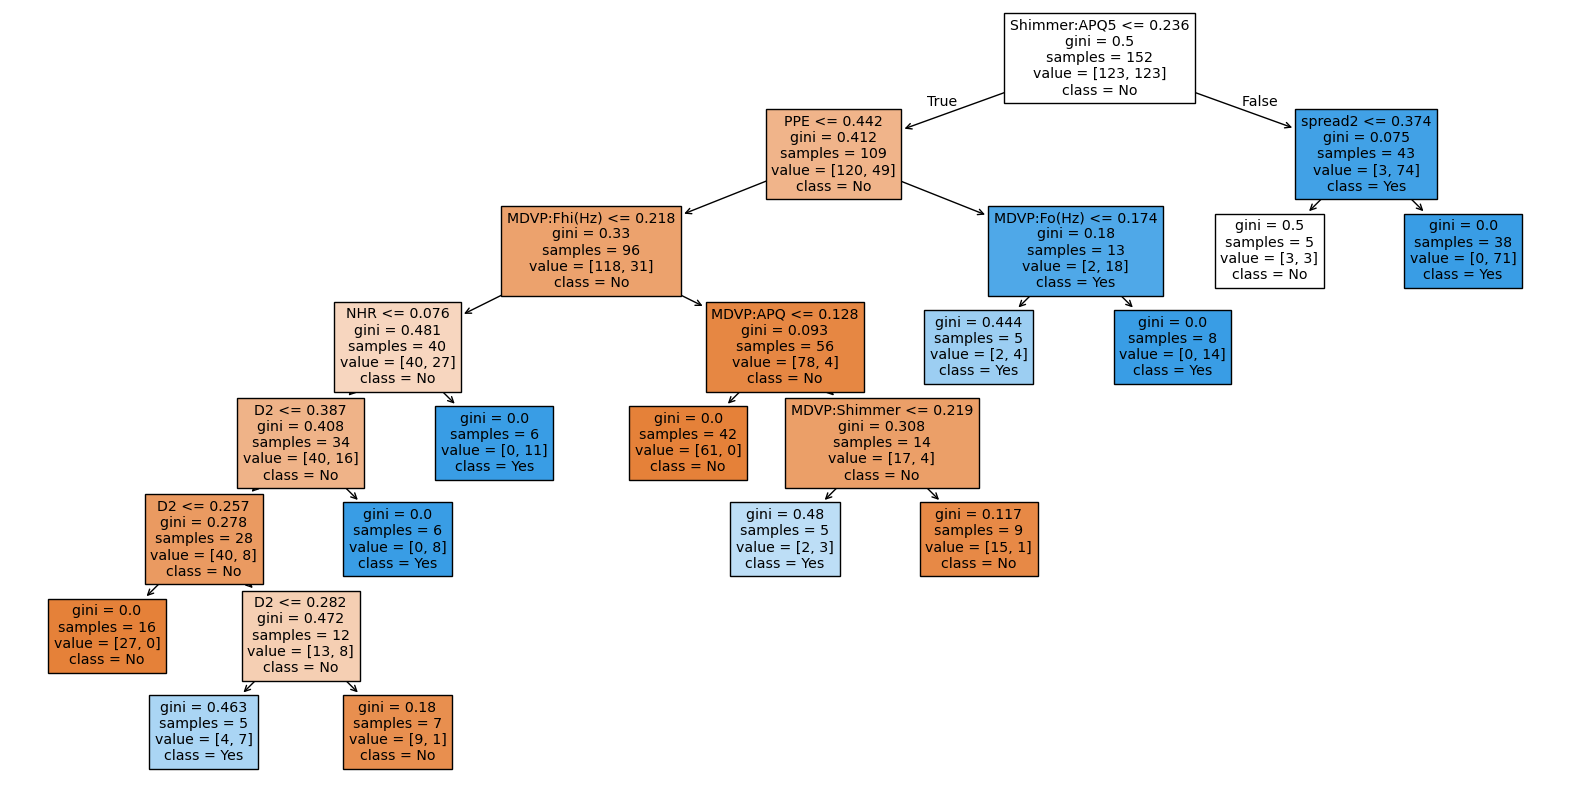

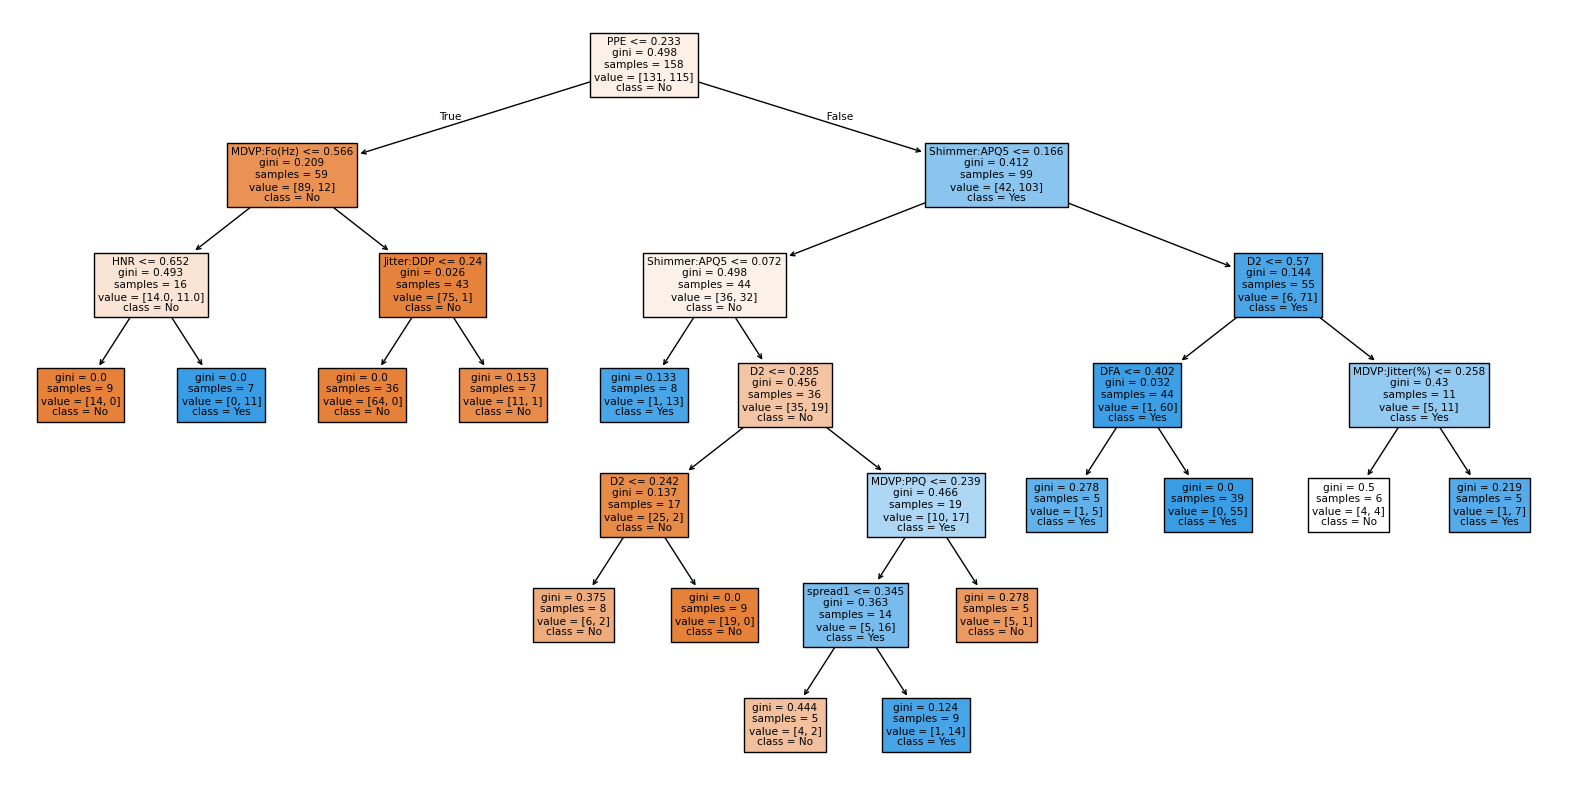

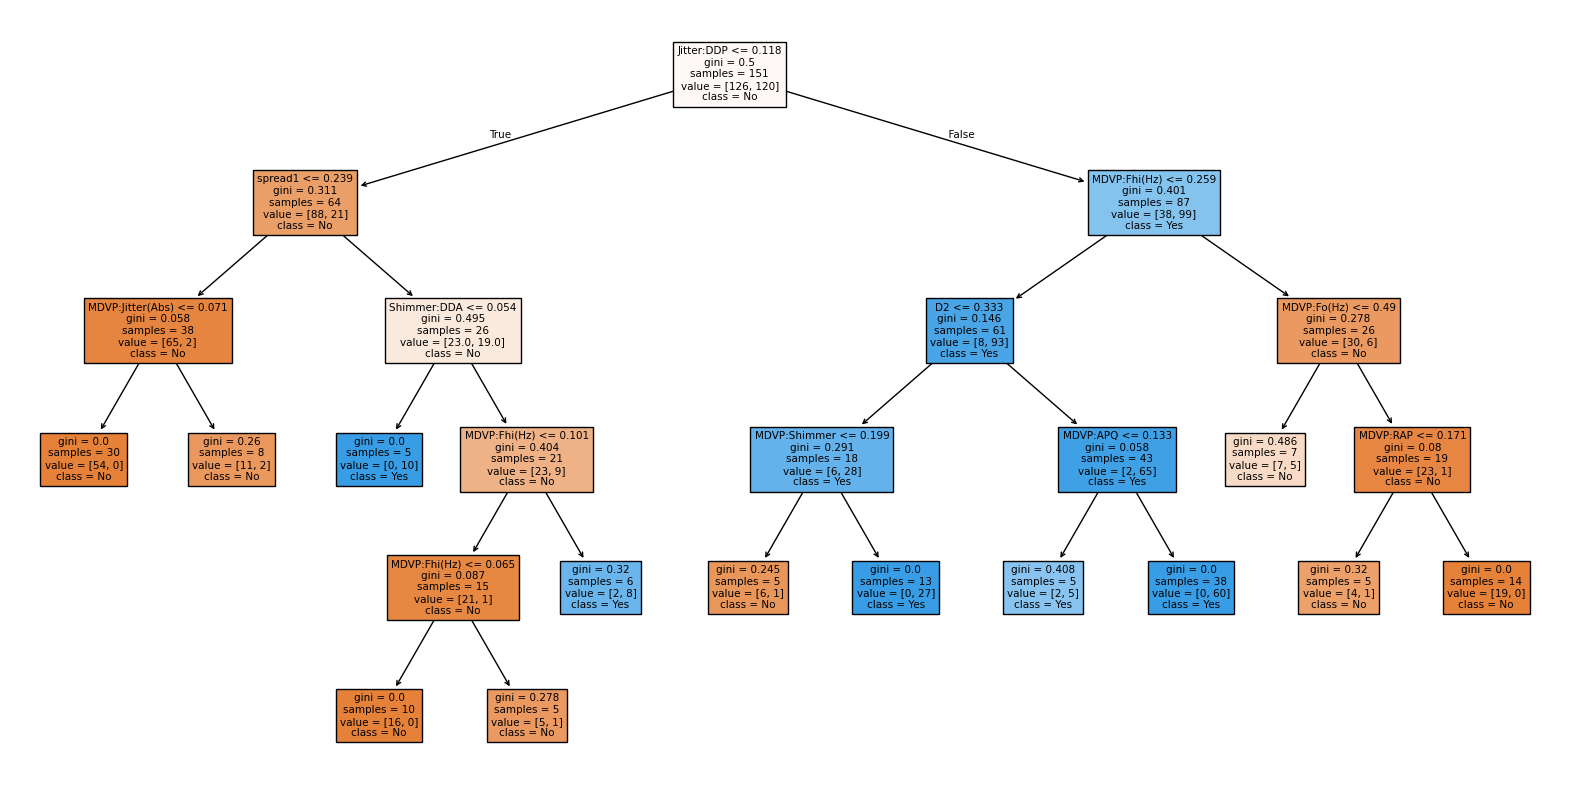

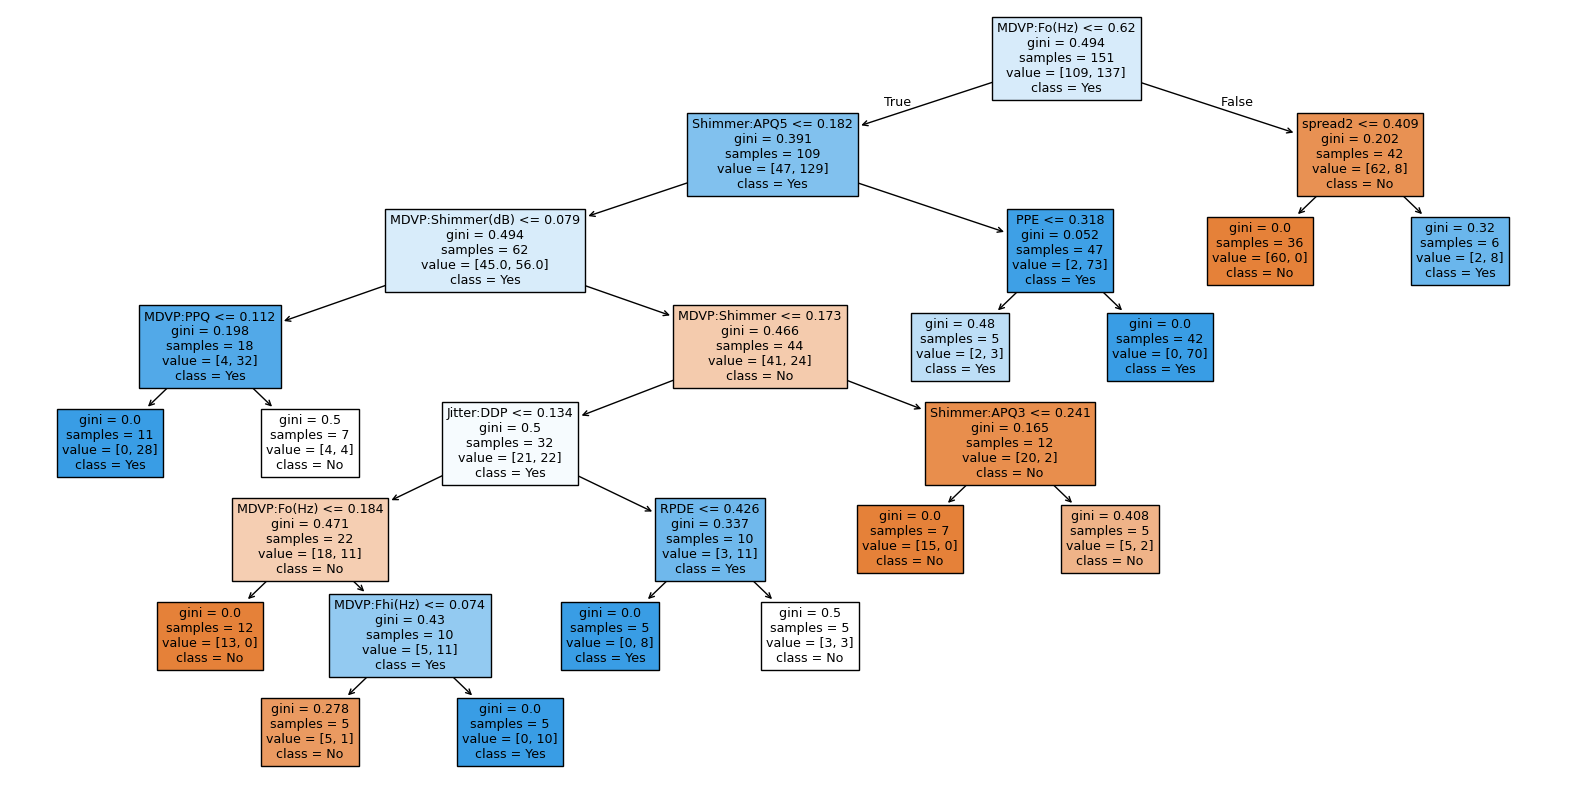

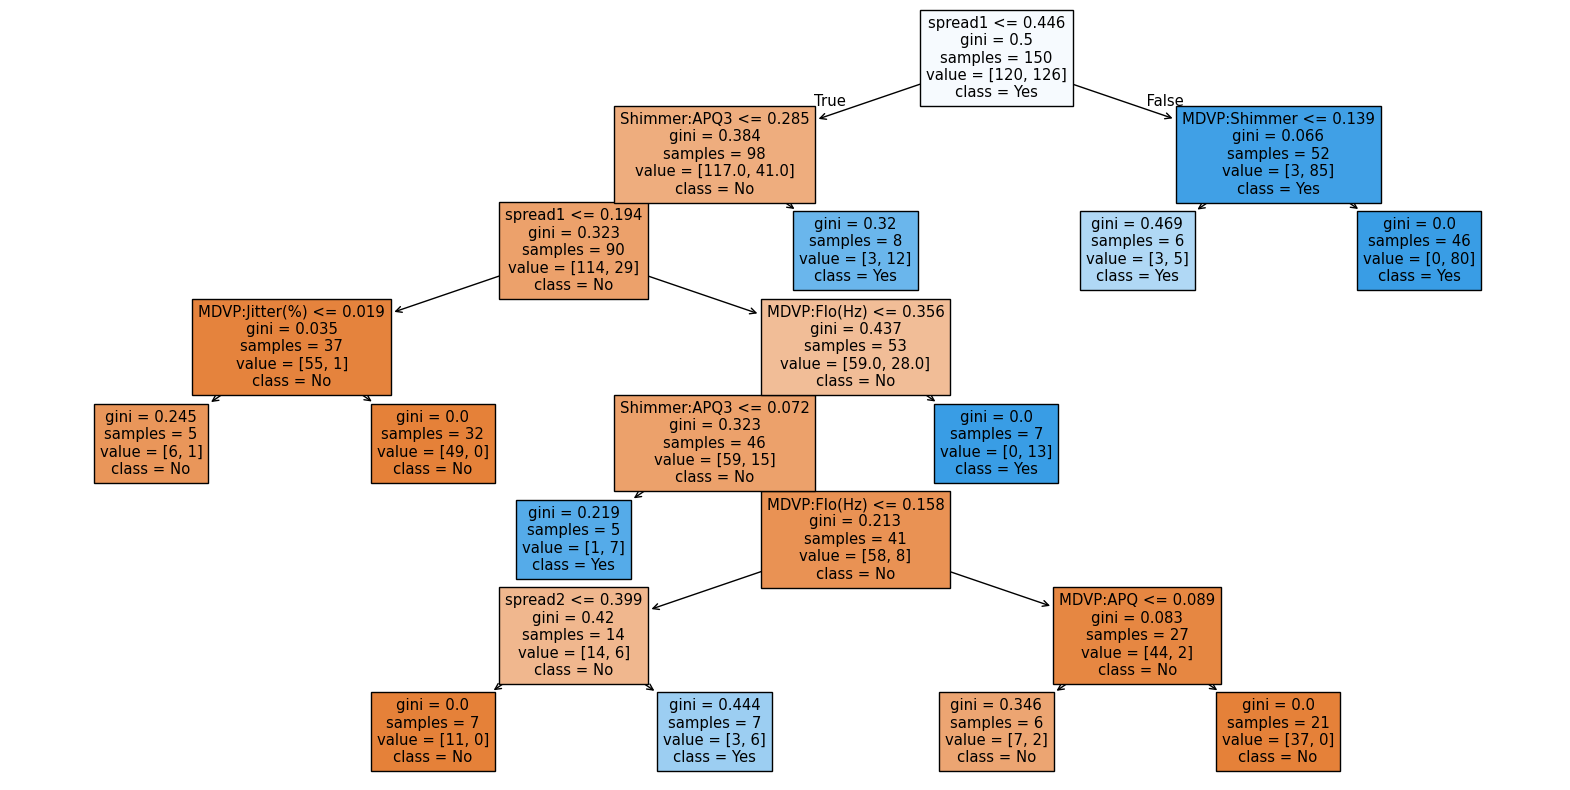

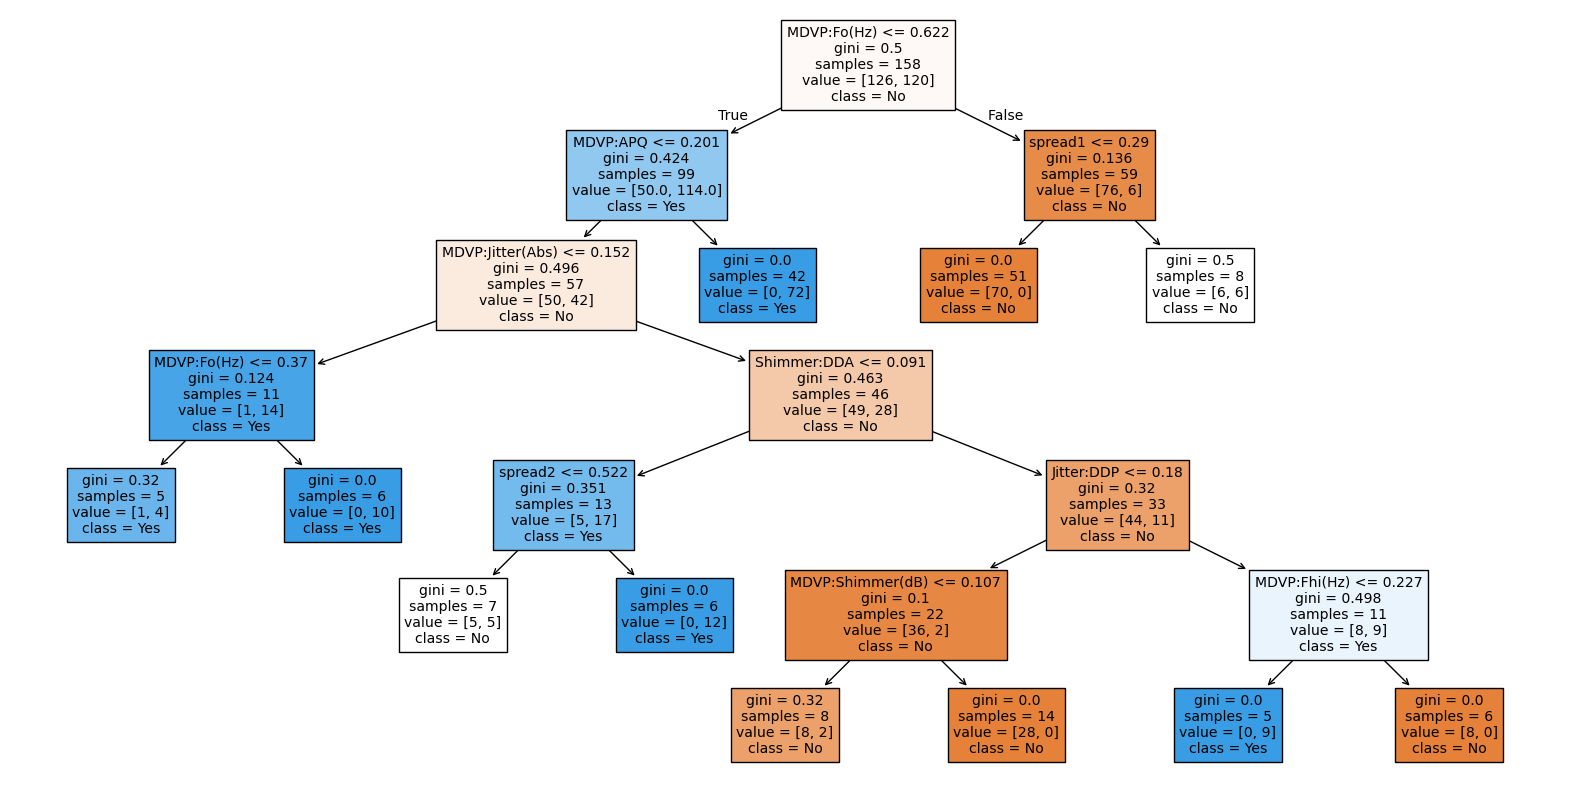

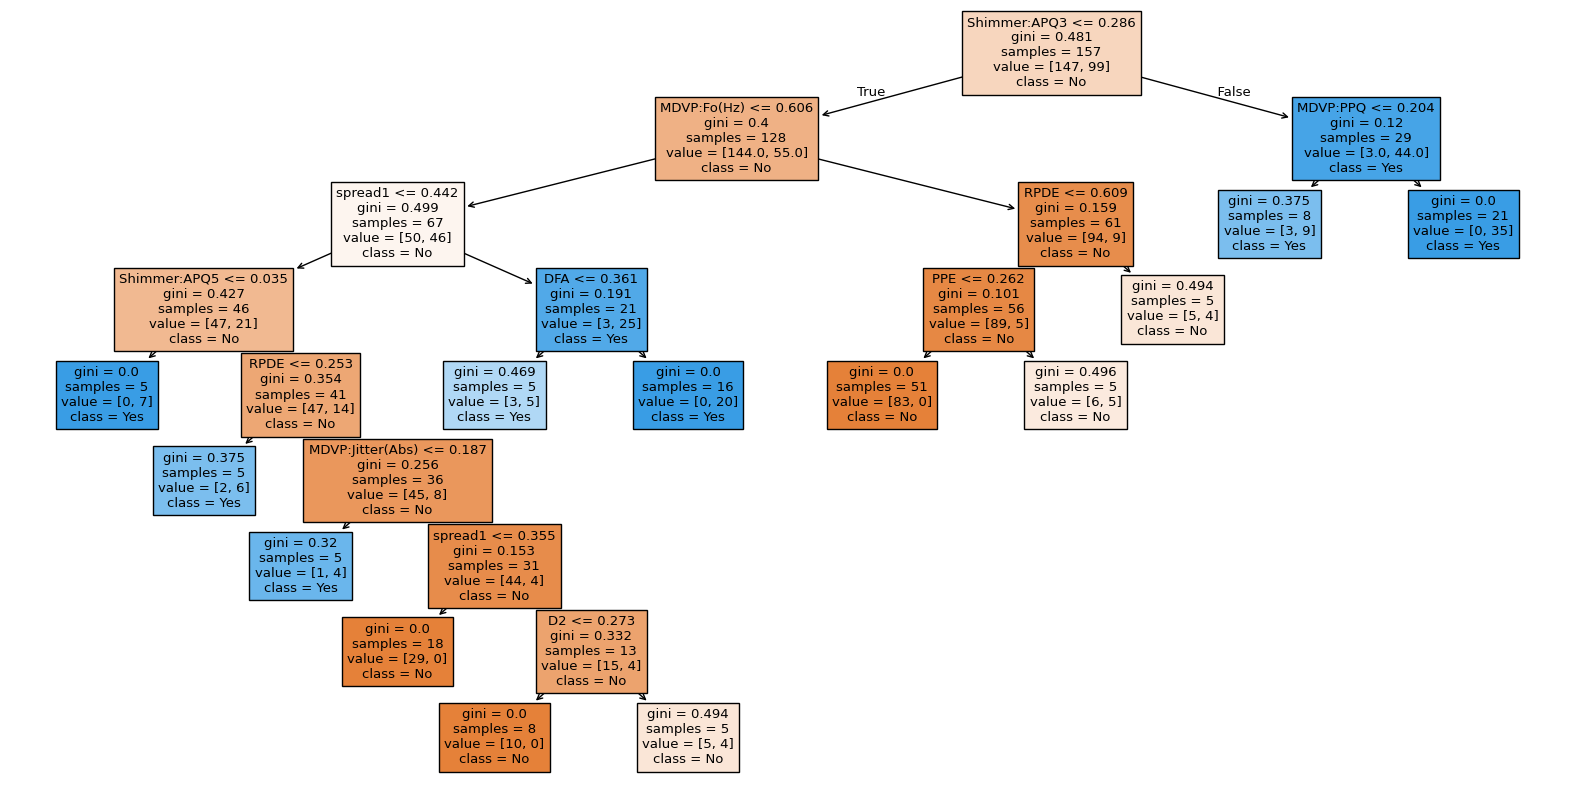

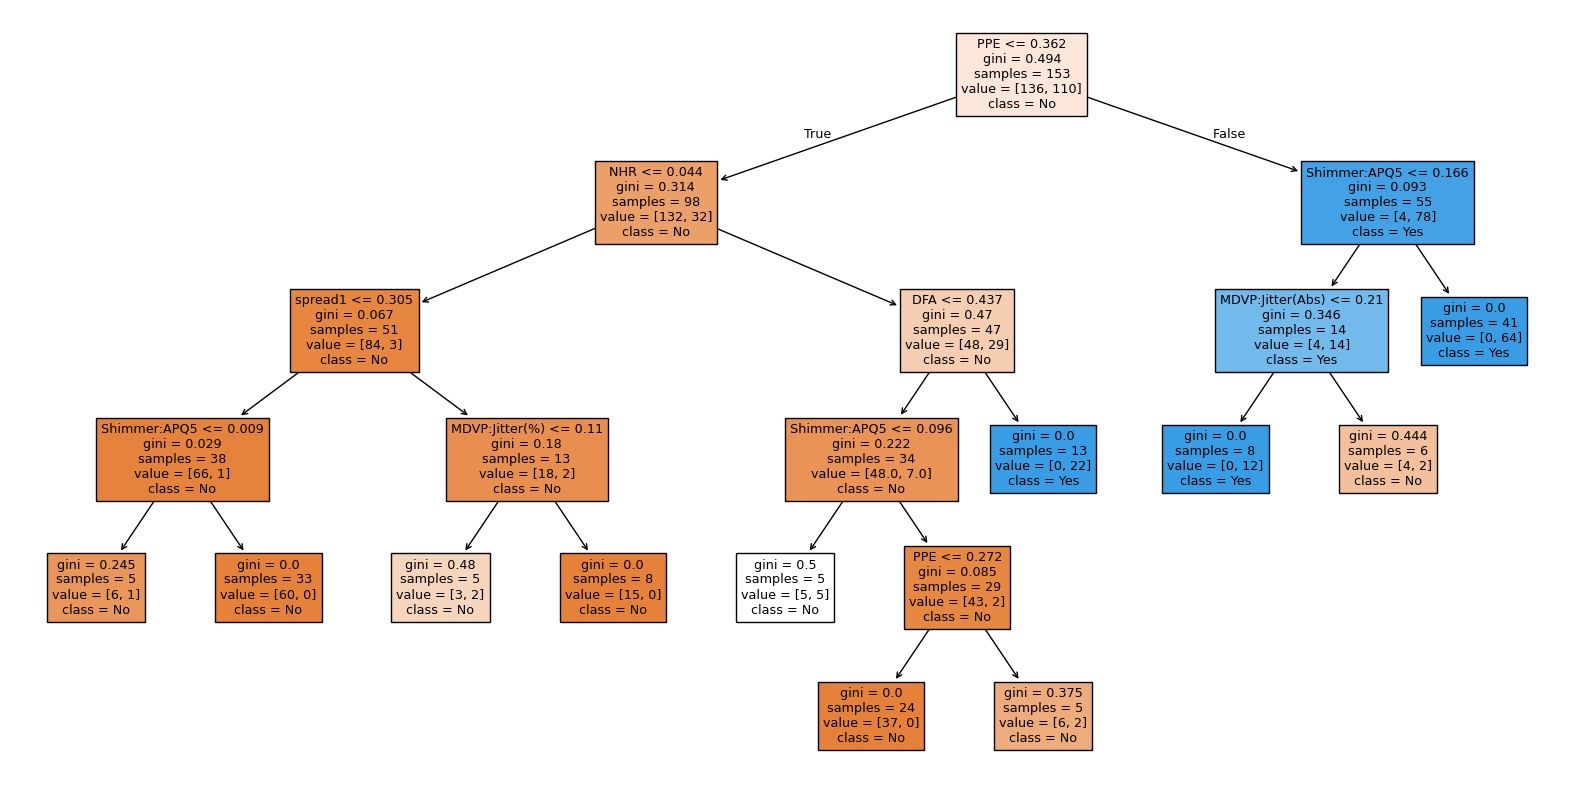

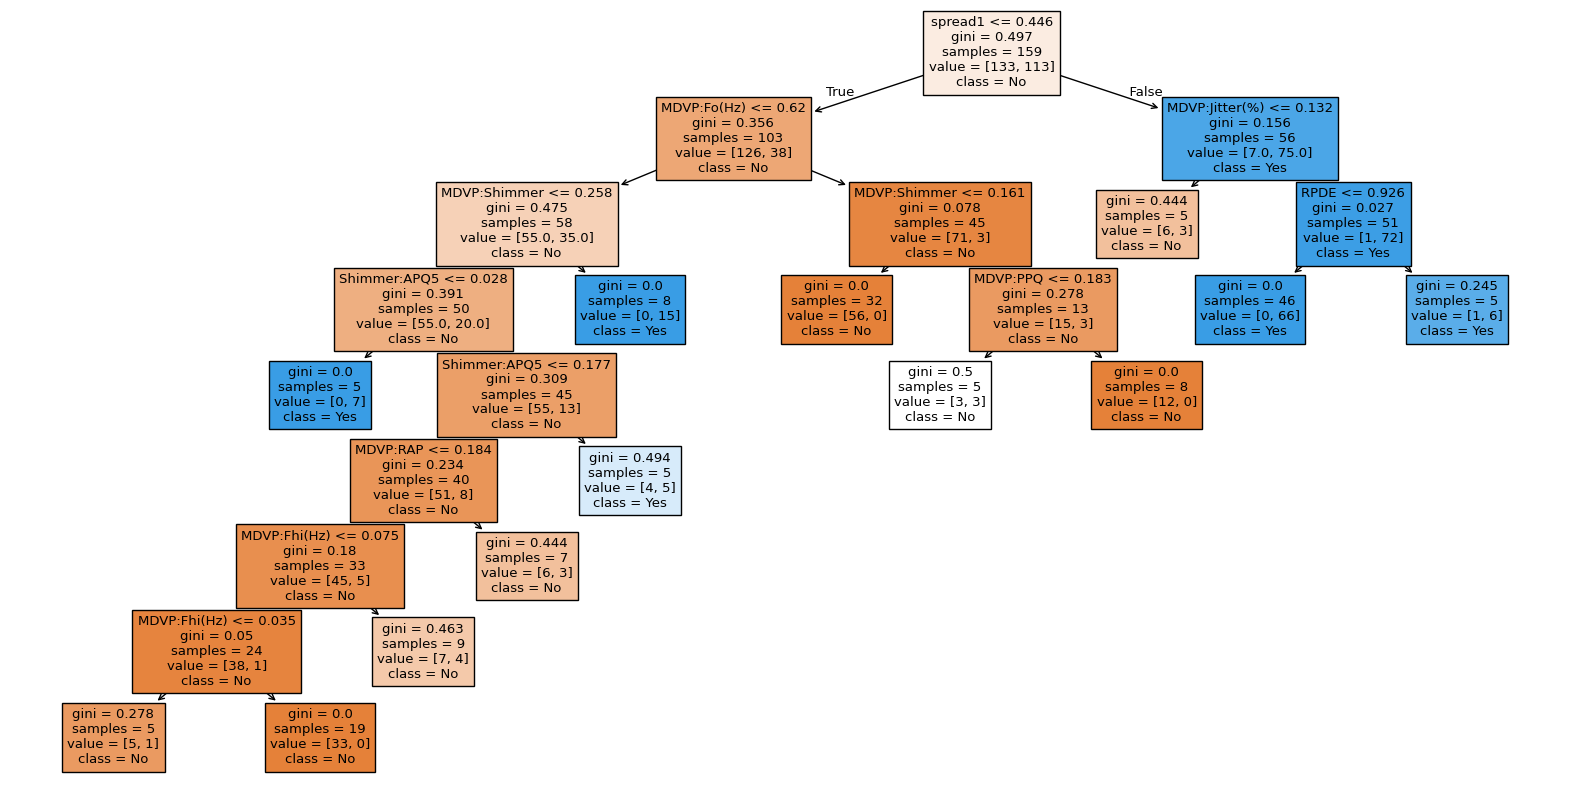

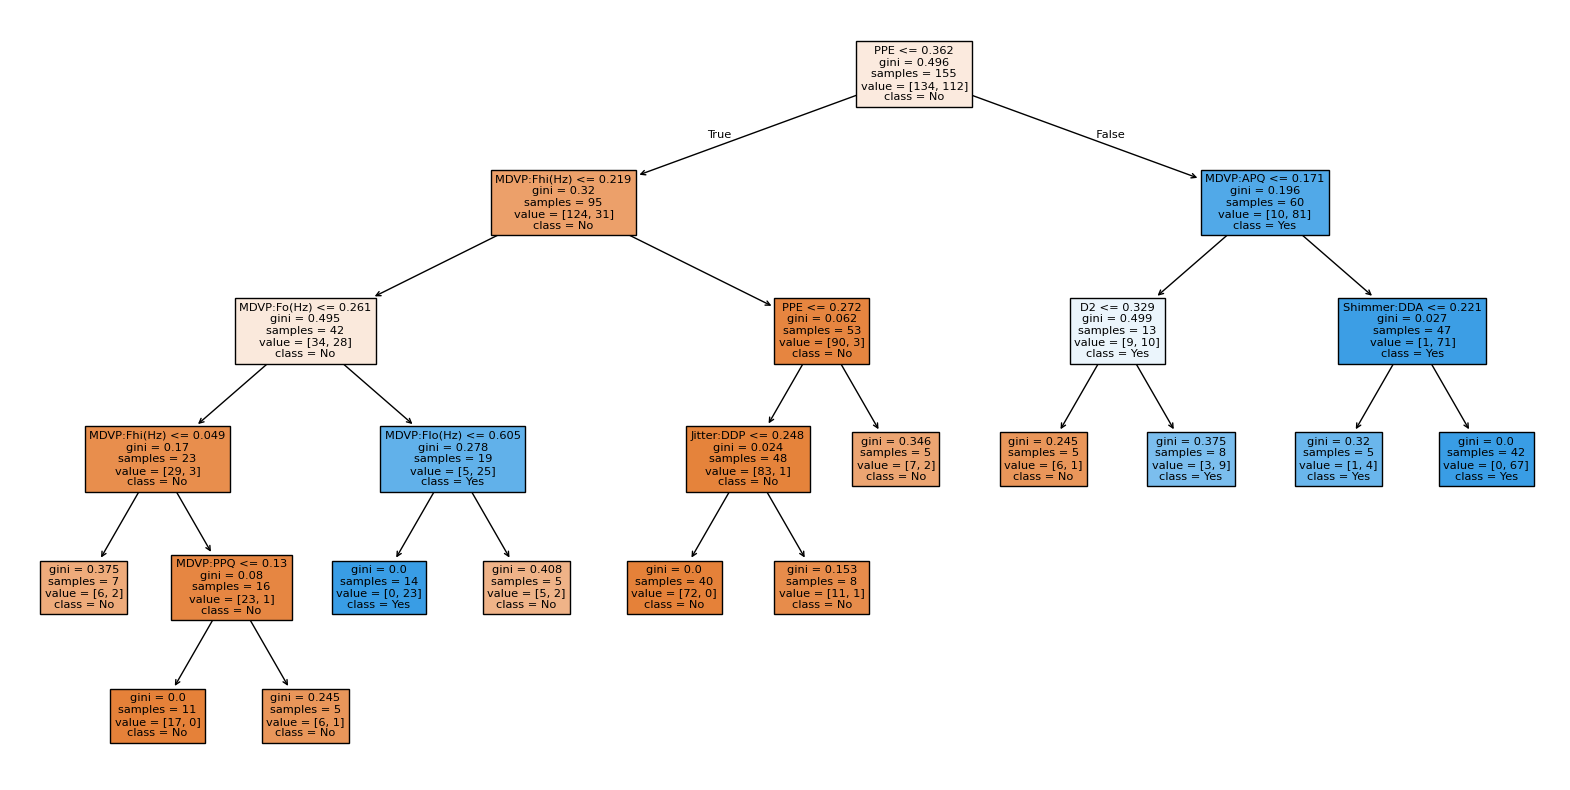

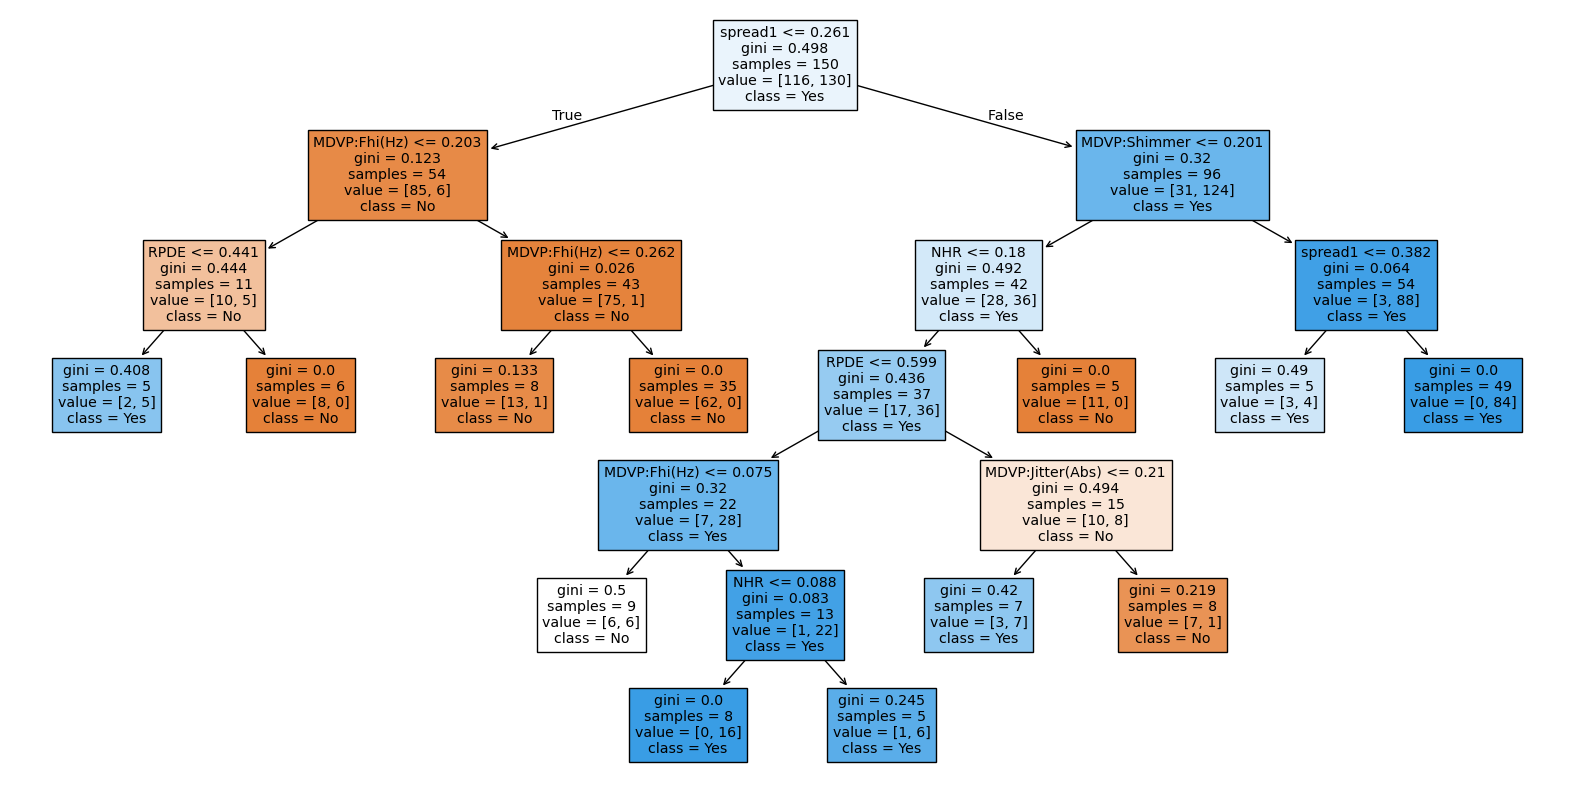

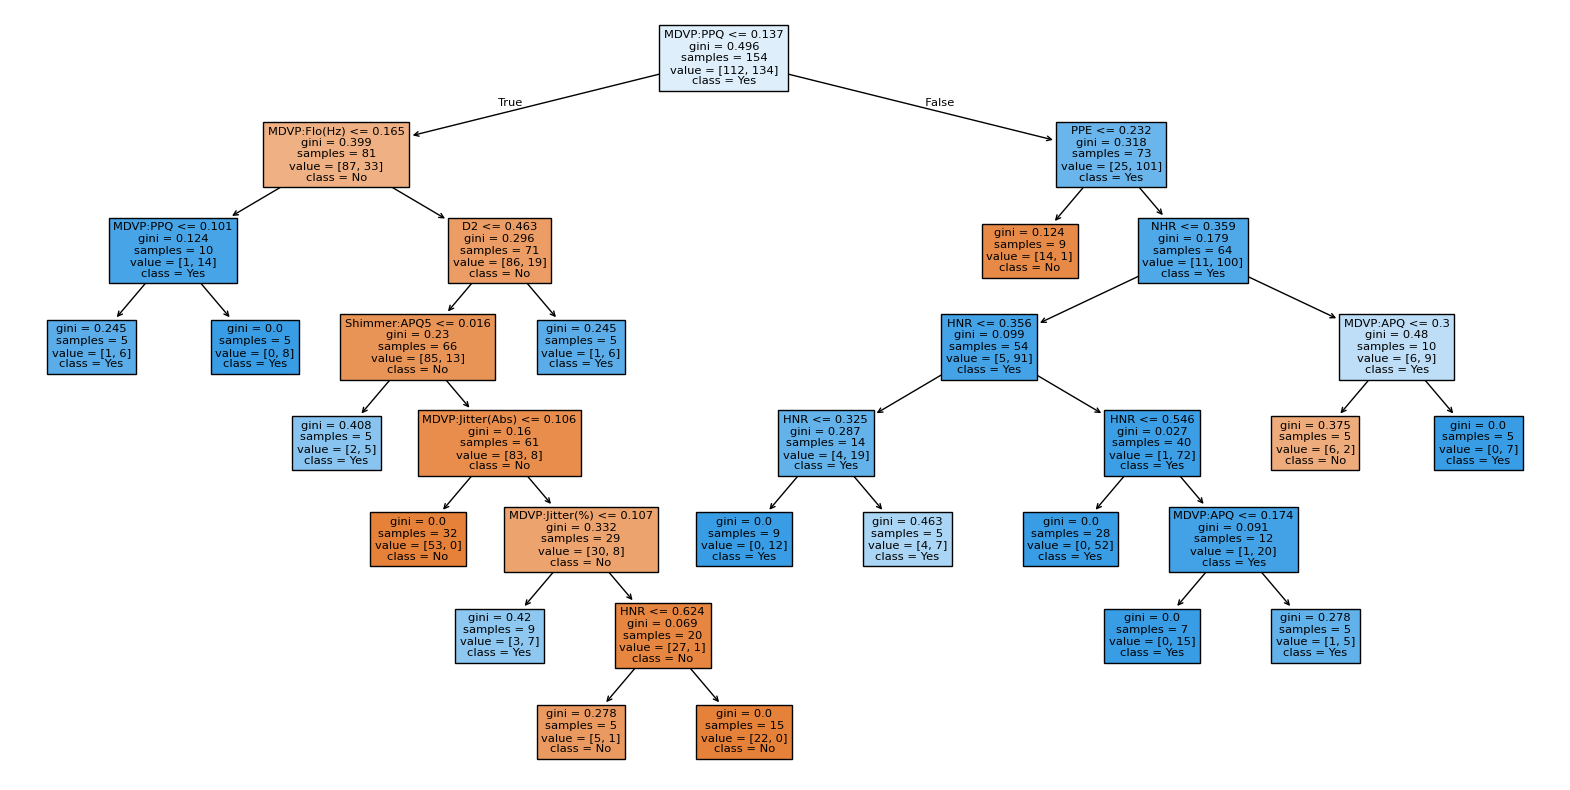

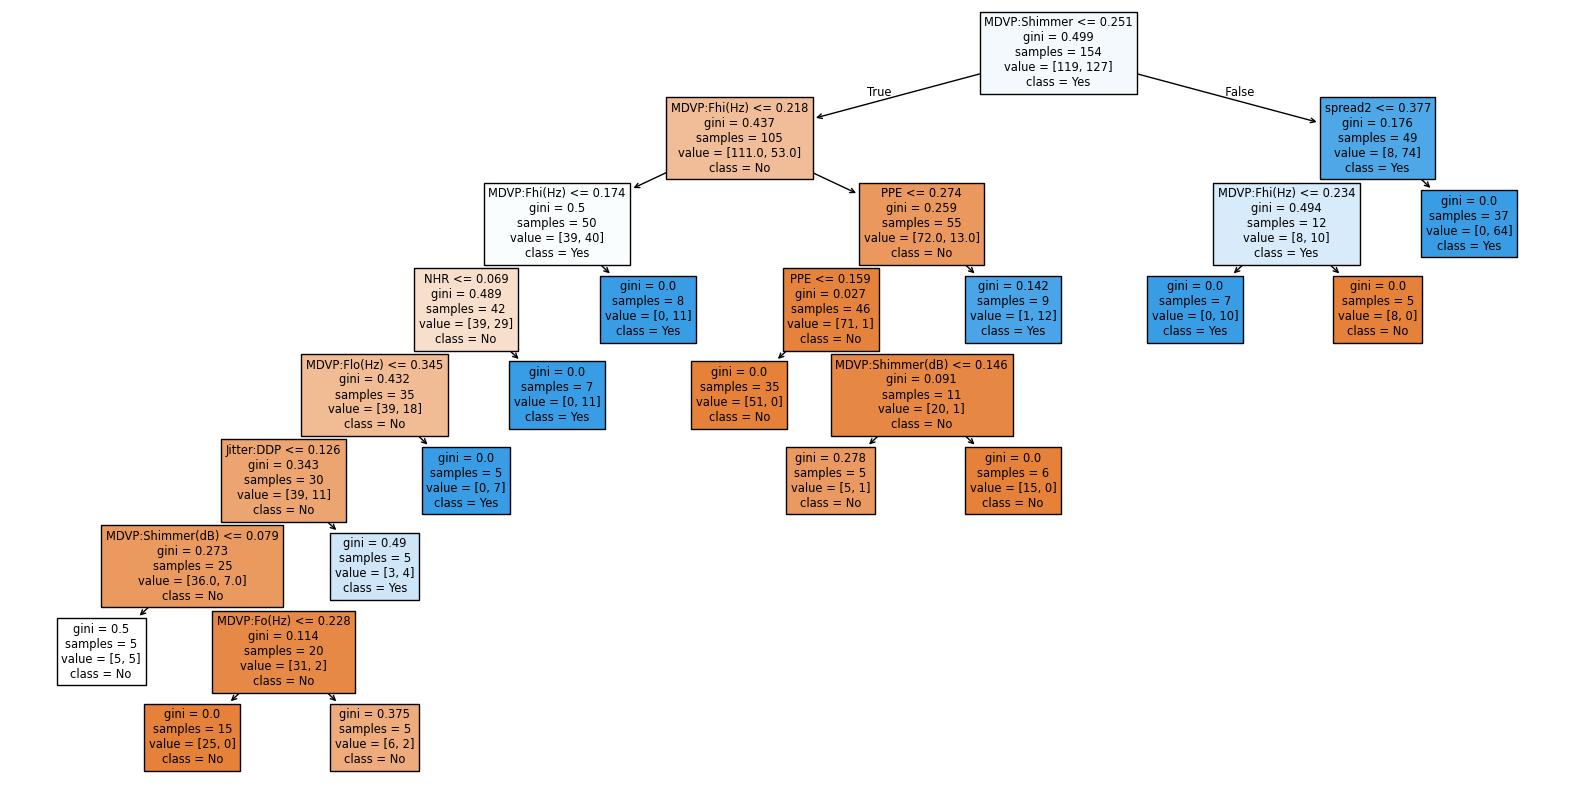

In [107]:
for model in model_random_forest.estimators_:
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
              filled=True, 
              feature_names=X.columns, 
              class_names=['No', 'Yes'])
    plt.show()